# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# import warnings
import warnings 

warnings.filterwarnings("ignore")

In [4]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.4
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [8]:
# Try loading one file

df = pd.read_parquet('./Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [10]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [ ]:
def sample_month_dataset(input_df):
    
    output_df = pd.DataFrame()
    input_df['date'] = pd.to_datetime(input_df['tpep_pickup_datetime']).dt.day
    input_df['hour'] = pd.to_datetime(input_df['tpep_pickup_datetime']).dt.hour
    input_df['month'] = pd.to_datetime(input_df['tpep_pickup_datetime']).dt.month
    
    # Loop through dates and then loop through every hour of each date
    for d in range(1, 32):
        # Iterate through each hour of the selected date
        for t in range (0, 24):
            hour_data = input_df[(input_df.hour == t) & (input_df.date == d)]
            # Sample 5% of the hourly data randomly
            sample = hour_data.sample(frac = 0.05, random_state = 36)
            # add data of this hour to the dataframe
            output_df = pd.concat([output_df, sample])
    
    return output_df

In [ ]:
# # Take a small percentage of entries from each hour of every date.
# # Iterating through the monthly data:
# #   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# # Create a single dataframe for the year combining all the monthly data

# # Select the folder having data files
import os
# Select the folder having data files
os.chdir('./Datasets and Dictionary/trip_records')
# Create a list of all the twelve files to read
file_list = os.listdir()
# initialise an empty dataframe
df = pd.DataFrame()
# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        # Reading the current file
        print(file_path)
        month_df = pd.read_parquet(file_path)
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        
        sample_month_data = sample_month_dataset(month_df)
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sample_month_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
df.to_parquet('sampled_data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [12]:
# Load the new data file
df = pd.read_parquet('sampled_data.parquet')

In [14]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
index                                                                         
1573          2  2023-12-01 00:20:38   2023-12-01 00:25:29              1.0   
737           1  2023-12-01 00:17:05   2023-12-01 00:26:51              1.0   
3246          2  2023-12-01 00:12:07   2023-12-01 00:15:28              1.0   
3753          2  2023-12-01 00:15:39   2023-12-01 00:18:12              3.0   
2100          2  2023-12-01 00:14:36   2023-12-01 00:14:43              1.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
index                                                               
1573            1.27         1.0                  N           164   
737             1.60         1.0                  N            68   
3246            0.35         1.0                  N            48   
3753            0.57         1.0                  N           164   
2100            0.00         2.0                  N            79   

       DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
index                              ...                             
1573            114             1  ...        3.23           0.0   
737              79             1  ...        2.25           0.0   
3246             48             1  ...        2.52           0.0   
3753            234             1  ...        2.02           0.0   
2100             79             2  ...        0.00           0.0   

       improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
index                                                                           
1573                     1.0         16.13                   2.5          0.0   
737                      1.0         17.25                   2.5          0.0   
3246                     1.0         12.62                   2.5          0.0   
3753                     1.0         12.12                   2.5          0.0   
2100                     1.0         74.00                   2.5          0.0   

       date  hour  month  airport_fee  
index                                  
1573      1     0     12          NaN  
737       1     0     12          NaN  
3246      1     0     12          NaN  
3753      1     0     12          NaN  
2100      1     0     12          NaN  

[5 rows x 23 columns]

In [16]:
df.tail()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
index                                                                           
3205160         2  2023-06-30 23:45:36   2023-06-30 23:57:16              1.0   
3205648         2  2023-06-30 23:21:56   2023-06-30 23:42:30              1.0   
3205417         2  2023-06-30 23:10:44   2023-06-30 23:16:27              1.0   
3203305         2  2023-06-30 23:48:46   2023-06-30 23:59:45              1.0   
1900            2  2023-05-31 23:56:56   2023-06-01 00:00:16              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
index                                                                 
3205160           1.51         1.0                  N           170   
3205648           5.35         1.0                  N            79   
3205417           0.28         1.0                  N           249   
3203305           2.23         1.0                  N           137   
1900              1.14         1.0                  N           230   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
index                                ...                             
3205160           246             1  ...        0.00           0.0   
3205648             7             1  ...        6.08           0.0   
3205417           249             1  ...        1.88           0.0   
3203305           249             1  ...        3.56           0.0   
1900               90             1  ...        2.30           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
index                                                                
3205160                    1.0         17.10                   2.5   
3205648                    1.0         36.48                   2.5   
3205417                    1.0         11.28                   2.5   
3203305                    1.0         21.36                   2.5   
1900                       1.0         13.80                   2.5   

         Airport_fee  date  hour  month  airport_fee  
index                                                 
3205160          0.0    30    23      6          NaN  
3205648          0.0    30    23      6          NaN  
3205417          0.0    30    23      6          NaN  
3203305          0.0    30    23      6          NaN  
1900             0.0    31    23      5          NaN  

[5 rows x 23 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896420 entries, 1573 to 1900
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

In [21]:
df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            65445
trip_distance                  0
RatecodeID                 65445
store_and_fwd_flag         65445
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       65445
Airport_fee               213857
date                           0
hour                           0
month                          0
airport_fee              1748008
dtype: int64

In [23]:
df.isnull().sum() / df.shape[0] * 100

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           3.450976
trip_distance             0.000000
RatecodeID                3.450976
store_and_fwd_flag        3.450976
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.450976
Airport_fee              11.276880
date                      0.000000
hour                      0.000000
month                     0.000000
airport_fee              92.174096
dtype: float64

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [26]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [29]:
import math

def clean_and_merge_airport_fees(col1, col2):
    if math.isnan(col1) and math.isnan(col2):
        return 0.0
    if math.isnan(col1):
        return float(col2)
    if math.isnan(col2):
        return float(col1)

    return float(col1) + float(col2)

In [31]:
df['airport_fee'] = df.apply(lambda x: clean_and_merge_airport_fees(x['Airport_fee'], x['airport_fee']), axis=1)

In [33]:
df.drop(['Airport_fee', 'tolls_amount', 'store_and_fwd_flag'], axis=1, inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896420 entries, 0 to 1896419
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  improvement_surcharge  float64       
 14  total_amount           float64       
 15  congestion_surcharge   float64       
 16  date                   int32         
 17  hour                   int32         
 18  month                 

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [38]:
# check where values of fare amount are negative
df[df['fare_amount'] < 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, month, airport_fee]
Index: []

In [40]:
df[df['total_amount'] < 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
24479           2  2023-12-05 12:18:38   2023-12-05 12:29:17              1.0   
34932           2  2023-12-06 23:34:23   2023-12-07 00:12:27              1.0   
35892           2  2023-12-07 08:00:13   2023-12-07 08:04:38              1.0   
43398           2  2023-12-08 10:03:03   2023-12-08 10:03:17              4.0   
47286           2  2023-12-08 21:49:53   2023-12-08 22:03:09              6.0   
...           ...                  ...                   ...              ...   
1707149         2  2023-03-27 13:00:56   2023-03-27 13:02:51              4.0   
1728777         2  2023-03-31 12:28:46   2023-03-31 12:46:11              1.0   
1733857         2  2023-06-01 10:49:08   2023-06-01 12:01:57              1.0   
1734281         2  2023-06-01 11:45:07   2023-06-01 11:45:22              3.0   
1840928         2  2023-06-20 16:02:57   2023-06-20 16:03:05              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
24479             1.73         1.0            66           231             2   
34932            11.55         1.0           170           124             2   
35892             0.00         5.0           162           162             2   
43398             0.00         5.0           265           265             2   
47286             2.35         1.0           237           238             2   
...                ...         ...           ...           ...           ...   
1707149           0.36         1.0           132           132             2   
1728777           7.99         1.0           138           236             2   
1733857          19.17         2.0           132           249             2   
1734281           0.00         3.0           158           158             2   
1840928           0.09         2.0           138           138             2   

         fare_amount  extra  mta_tax  tip_amount  improvement_surcharge  \
24479            0.0    0.0     -0.5         0.0                   -1.0   
34932            0.0    0.0     -0.5         0.0                   -1.0   
35892            0.0    0.0      0.0         0.0                   -1.0   
43398            0.0    0.0      0.0         0.0                   -1.0   
47286            0.0    0.0     -0.5         0.0                   -1.0   
...              ...    ...      ...         ...                    ...   
1707149          0.0    0.0     -0.5         0.0                   -1.0   
1728777          0.0    0.0     -0.5         0.0                   -1.0   
1733857          0.0    0.0     -0.5         0.0                   -1.0   
1734281          0.0    0.0      0.0         0.0                   -1.0   
1840928          0.0    0.0     -0.5         0.0                   -1.0   

         total_amount  congestion_surcharge  date  hour  month  airport_fee  
24479           -4.00                  -2.5     5    12     12         0.00  
34932           -4.00                  -2.5     6    23     12         0.00  
35892           -3.50                  -2.5     7     8     12         0.00  
43398           -1.00                   0.0     8    10     12         0.00  
47286           -4.00                  -2.5     8    21     12         0.00  
...               ...                   ...   ...   ...    ...          ...  
1707149         -5.25                  -2.5    27    13      3        -1.25  
1728777         -5.25                  -2.5    31    12      3        -1.25  
1733857         -5.75                  -2.5     1    10      6        -1.75  
1734281         -1.00                   0.0     1    11      6         0.00  
1840928         -3.25                   0.0    20    16      6        -1.75  

[104 rows x 20 columns]

### Dropping rows with negative total_amount 

In [43]:
df = df[df['total_amount'] >= 0]

Did you notice something different in the `RatecodeID` column for above records?

In [46]:
# Analyse RatecodeID for the negative fare amounts
df['RatecodeID'].value_counts()

RatecodeID
1.0     1727115
2.0       72574
99.0      10798
5.0       10486
3.0        6098
4.0        3800
Name: count, dtype: int64

Yes there is a 99.0 RatecodeID which is not a valid rateCodeID

In [49]:
# checking percentange values for ratecodeID
(df['RatecodeID'].value_counts() / df.shape[0]) * 100

RatecodeID
1.0     91.077384
2.0      3.827105
99.0     0.569420
5.0      0.552967
3.0      0.321571
4.0      0.200389
Name: count, dtype: float64

#### There are about 0.56% of rows which consist of 99 ratecodeID
##### which is in the acceptable range to drop the rows

In [52]:
df = df[df['RatecodeID'] != 99]

In [54]:
# Find which columns have negative values

import pandas.api.types as ptypes

def check_negative_values(df):
    neg_val_l = []
    for i in df.columns:
        if ptypes.is_numeric_dtype(df[i]):
            if df[i].min() < 0:
                neg_val_l.append(i)
    return neg_val_l
    

#### These are rows with negative values.

In [57]:
check_negative_values(df)

['extra']

In [59]:
df[df['extra'] < 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
53889          2  2023-12-09 20:43:16   2023-12-09 20:43:24              2.0   
141562         2  2023-12-25 12:36:38   2023-12-25 12:43:50              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
53889            0.00         1.0           148           148             2   
141562           2.01         1.0           125           186             1   

        fare_amount  extra  mta_tax  tip_amount  improvement_surcharge  \
53889           3.0   -1.5      0.5        0.00                    1.0   
141562         11.4   -2.5      0.5        3.08                    1.0   

        total_amount  congestion_surcharge  date  hour  month  airport_fee  
53889           8.00                   2.5     9    20     12          0.0  
141562         18.48                   2.5    25    12     12          0.0

#### There are only 2 entries where "extra" has negative value so we can drop them.

In [62]:
df = df[df['extra'] >= 0]

In [64]:
check_negative_values(df)

[]

### Checking if dropoff time is after pickup time for logical sanity of the data

In [67]:
df[df['tpep_dropoff_datetime'] < df['tpep_pickup_datetime']].head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
44274          6  2023-12-08 13:12:53   2023-12-08 13:12:19              NaN   
60822          6  2023-12-11 06:12:50   2023-12-11 06:12:38              NaN   
141586         6  2023-12-25 13:12:44   2023-12-25 13:12:24              NaN   
144835         6  2023-12-26 15:12:31   2023-12-26 15:12:11              NaN   
369781         6  2023-05-08 06:05:49   2023-05-08 06:05:13              NaN   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
44274            3.43         NaN           265           226             0   
60822            8.33         NaN           265            41             0   
141586          17.48         NaN           265            29             0   
144835          13.50         NaN           265            80             0   
369781          14.35         NaN           265            50             0   

        fare_amount  extra  mta_tax  tip_amount  improvement_surcharge  \
44274         27.11    0.0      0.5         0.0                    0.3   
60822         26.20    0.0      0.5         0.0                    0.3   
141586        53.36    0.0      0.5         0.0                    0.3   
144835        44.14    0.0      0.5         0.0                    0.3   
369781        46.54    0.0      0.5         0.0                    0.3   

        total_amount  congestion_surcharge  date  hour  month  airport_fee  
44274          27.91                   NaN     8    13     12          0.0  
60822          27.00                   NaN    11     6     12          0.0  
141586         54.16                   NaN    25    13     12          0.0  
144835         44.94                   NaN    26    15     12          0.0  
369781         47.34                   NaN     8     6      5          0.0

### Looks like we have some entries where dropoff time is before pickup time
### We should drop these rows

In [70]:
df = df[df['tpep_dropoff_datetime'] > df['tpep_pickup_datetime']]

In [72]:
def total_seconds(timedelta):
    try:
        seconds = timedelta.total_seconds()
    except AttributeError:
        one_second = np.timedelta64(1000000000, 'ns')
        seconds = timedelta / one_second
    return int(seconds)

In [74]:
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [76]:
df['trip_duration_secs'] = df['trip_duration'].apply(total_seconds)

### Capping entries at trip_duration of a day (86400 secs)

In [78]:
df = df[df['trip_duration_secs'] < 86400]

Check for trip which have duration less than a 2 mins (120 secs)

In [81]:
df = df[ ~ ((df['trip_duration_secs'] < 120) & (df['trip_distance'] == 0)) ]

Checking to see if we have any data that does not belong to 2023

In [84]:
df['PUYear'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.year

In [86]:
df = df[df['PUYear'] == 2023]

In [88]:
df['DOYear'] = pd.to_datetime(df['tpep_dropoff_datetime']).dt.year

In [90]:
df = df[df['DOYear'] == 2023]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [94]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          65057
trip_distance                0
RatecodeID               65057
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     65057
date                         0
hour                         0
month                        0
airport_fee                  0
trip_duration                0
trip_duration_secs           0
PUYear                       0
DOYear                       0
dtype: int64

In [96]:
# Find the proportion of missing values in each column
(df.isnull().sum() / df.shape[0]) * 100

VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          3.47526
trip_distance            0.00000
RatecodeID               3.47526
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     3.47526
date                     0.00000
hour                     0.00000
month                    0.00000
airport_fee              0.00000
trip_duration            0.00000
trip_duration_secs       0.00000
PUYear                   0.00000
DOYear                   0.00000
dtype: float64

##### There are 3.47% i.e 65057 records with null values in passenger_count, RatecodeID, store_and_fwd_flag and congestion_surcharge


##### This is within the acceptable range to drop the given records

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [100]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df['passenger_count'].isnull() & df['RatecodeID'].isnull() & df['congestion_surcharge'].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
31              1  2023-12-01 00:11:55   2023-12-01 00:24:01              NaN   
77              2  2023-12-01 00:06:17   2023-12-01 00:23:20              NaN   
219             2  2023-12-01 01:49:52   2023-12-01 02:13:40              NaN   
221             2  2023-12-01 01:41:37   2023-12-01 01:54:36              NaN   
263             2  2023-12-01 01:27:02   2023-12-01 02:01:31              NaN   
...           ...                  ...                   ...              ...   
1896232         2  2023-06-30 23:26:06   2023-06-30 23:58:39              NaN   
1896259         1  2023-06-30 23:41:59   2023-07-01 00:00:07              NaN   
1896306         2  2023-06-30 23:30:50   2023-06-30 23:51:27              NaN   
1896314         2  2023-06-30 23:30:21   2023-07-01 00:00:46              NaN   
1896344         1  2023-06-30 23:24:26   2023-06-30 23:49:32              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
31                2.20         NaN           163           262             0   
77                3.40         NaN           158           162             0   
219               9.67         NaN           113           116             0   
221               4.02         NaN            88           246             0   
263              14.24         NaN           145           216             0   
...                ...         ...           ...           ...           ...   
1896232          10.27         NaN           107           244             0   
1896259           0.00         NaN           161           112             0   
1896306           2.65         NaN           148           186             0   
1896314           9.20         NaN            42           148             0   
1896344           5.00         NaN           142           144             0   

         fare_amount  ...  total_amount  congestion_surcharge  date  hour  \
31             14.20  ...         22.08                   NaN     1     0   
77             12.84  ...         20.21                   NaN     1     0   
219            46.97  ...         50.97                   NaN     1     1   
221            21.31  ...         27.31                   NaN     1     1   
263            42.37  ...         52.92                   NaN     1     1   
...              ...  ...           ...                   ...   ...   ...   
1896232        39.45  ...         43.45                   NaN    30    23   
1896259        19.50  ...         30.05                   NaN    30    23   
1896306        18.87  ...         22.87                   NaN    30    23   
1896314        38.53  ...         51.04                   NaN    30    23   
1896344        25.40  ...         33.44                   NaN    30    23   

         month  airport_fee   trip_duration  trip_duration_secs  PUYear  \
31          12          0.0 0 days 00:12:06                 726    2023   
77          12          0.0 0 days 00:17:03                1023    2023   
219         12          0.0 0 days 00:23:48                1428    2023   
221         12          0.0 0 days 00:12:59                 779    2023   
263         12          0.0 0 days 00:34:29                2069    2023   
...        ...          ...             ...                 ...     ...   
1896232      6          0.0 0 days 00:32:33                1953    2023   
1896259      6          0.0 0 days 00:18:08                1088    2023   
1896306      6          0.0 0 days 00:20:37                1237    2023   
1896314      6          0.0 0 days 00:30:25                1825    2023   
1896344      6          0.0 0 days 00:25:06                1506    2023   

         DOYear  
31         2023  
77         2023  
219        2023  
221        2023  
263        2023  
...         ...  
1896232    2023  
1896259    2023  
1896306    2023  
1896314    2023  
1896344    2023  

[65057 rows x 24 columns]

In [102]:
df = df[~df['passenger_count'].isnull()]

Did you find zeroes in passenger_count? Handle these.

In [105]:
df['passenger_count'].value_counts()

passenger_count
1.0    1356264
2.0     276401
3.0      68079
4.0      38101
0.0      28288
5.0      24126
6.0      15679
7.0          4
8.0          3
9.0          2
Name: count, dtype: int64

In [107]:
(df['passenger_count'].value_counts() / df.shape[0]) * 100

passenger_count
1.0    75.058317
2.0    15.296575
3.0     3.767626
4.0     2.108584
0.0     1.565514
5.0     1.335180
6.0     0.867707
7.0     0.000221
8.0     0.000166
9.0     0.000111
Name: count, dtype: float64

### There are about 1.56% rows which have 0 passenger_count, which is a bit strange and its within the margin of error so we will drop these rows

In [110]:
df = df[df['passenger_count'] > 0.0]

In [112]:
(df['passenger_count'].value_counts() / df.shape[0]) * 100

passenger_count
1.0    76.252053
2.0    15.539853
3.0     3.827546
4.0     2.142119
5.0     1.356415
6.0     0.881507
7.0     0.000225
8.0     0.000169
9.0     0.000112
Name: count, dtype: float64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [115]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].isnull().sum()

0

In [117]:
df['RatecodeID'].value_counts()

RatecodeID
1.0    1693606
2.0      70364
3.0       5762
5.0       5176
4.0       3751
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [120]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].isnull().sum()

0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

##### Handle any remaining missing values
##### there are no more null values

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [122]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"Number of outliers in {column}: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")
    
    # Visualize outliers
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column} showing outliers')
    plt.show()

We will check the following columns
- passenger_count
- trip_distance
- tip amount

In [125]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

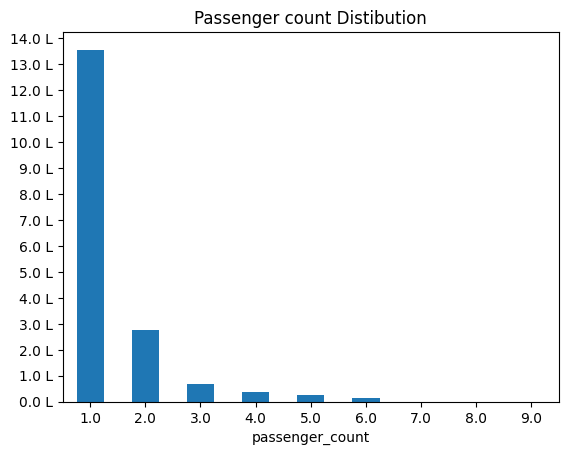

In [127]:
df['passenger_count'].value_counts().plot.bar()
plt.xticks(rotation=0)

plt.yticks(
    ticks=np.arange(0, 1500000, 100000),
    labels=['{0} L'.format(x/100000) for x in np.arange(0, 1500000, 100000)],
)
plt.title('Passenger count Distibution')
plt.show()

Number of outliers in payment_type: 324973
Percentage of outliers: 18.27%


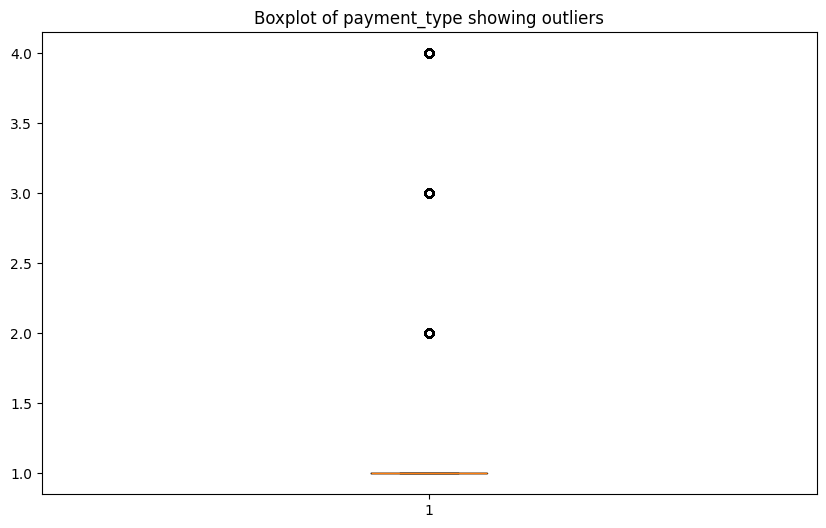

In [129]:
detect_outliers(df, 'payment_type')

Number of outliers in passenger_count: 422395
Percentage of outliers: 23.75%


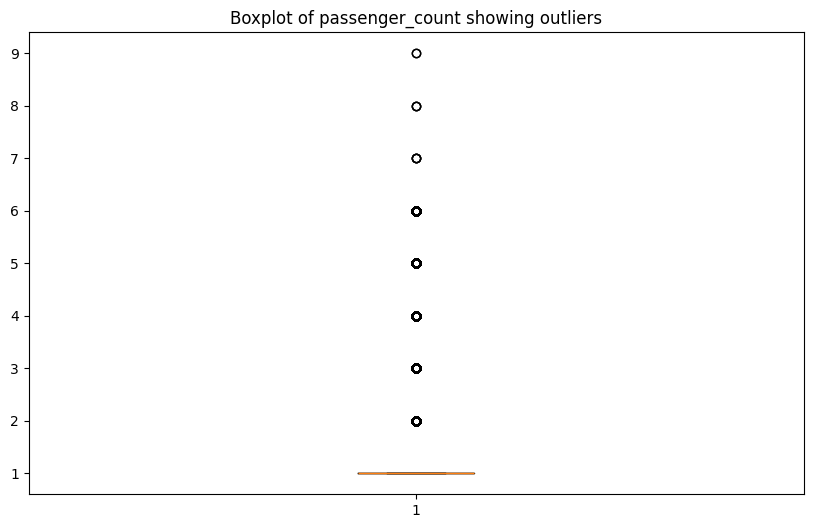

In [131]:
detect_outliers(df, 'passenger_count')

Number of outliers in trip_distance: 236378
Percentage of outliers: 13.29%


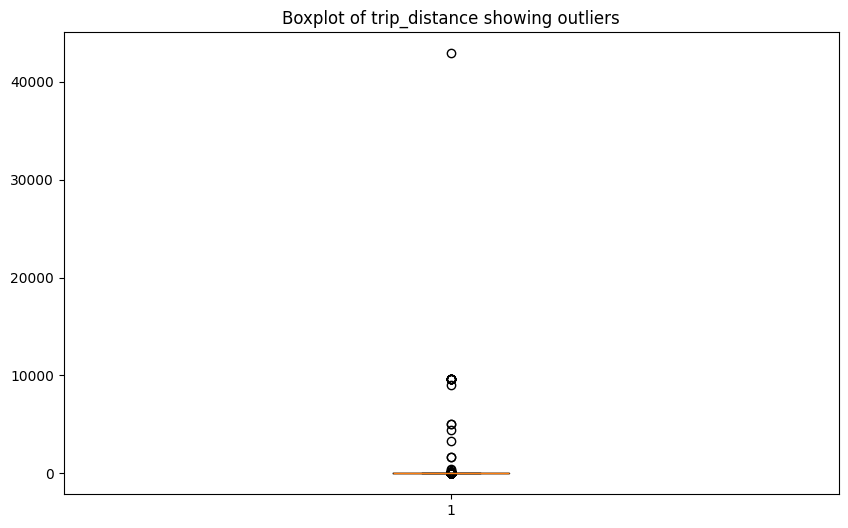

In [133]:
detect_outliers(df, 'trip_distance')

Number of outliers in tip_amount: 138459
Percentage of outliers: 7.78%


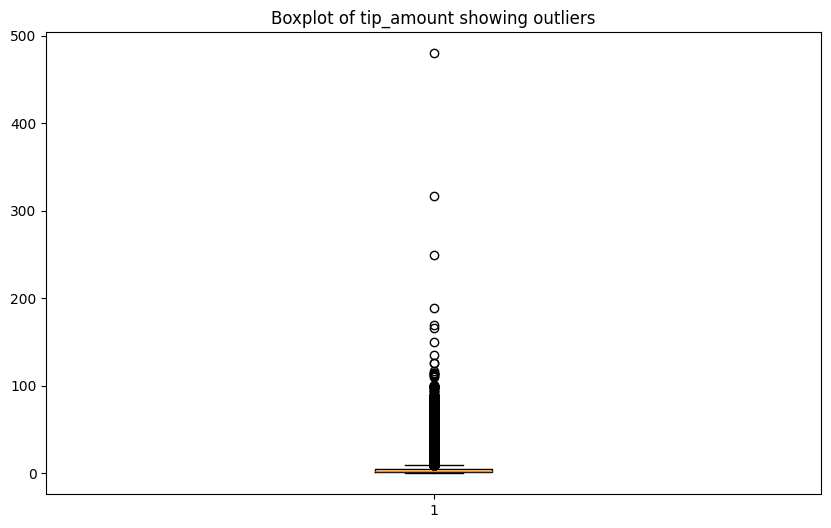

In [135]:
detect_outliers(df, 'tip_amount')

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [140]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [142]:
# handling scenario where trip_distance is < 1 and tip amount is > 300
df = df[~((df['trip_distance'] < 1) & (df['fare_amount'] > 300))]

In [144]:
# handling scenario where trip_distance is > 250 miles
df = df[df['trip_distance'] <= 25000]

In [146]:
df[['passenger_count', 'trip_distance', 'payment_type', 'tip_amount']][df['tip_amount'] > 200]

passenger_count  trip_distance  payment_type  tip_amount
149401               2.0            1.6             1      316.47
629306               1.0            2.2             1      480.10
1296660              2.0            2.3             1      250.00

#### this seems abnornal that the trip_distance is quite small but tip_amount is quite high
#### dropping these rows

In [149]:
df = df[df['tip_amount'] < 200]

In [151]:
# handling scenario where Entries where trip_distance and fare_amount are 0 
# but the pickup and dropoff zones are different 
df = df[~((df['trip_distance'] < 1) & (df['fare_amount'] < 1) & (df['PULocationID'] != df['DOLocationID']))]

In [153]:
df['payment_type'].value_counts()

payment_type
1    1453663
2     306287
4      12178
3       6452
Name: count, dtype: int64

In [155]:
# Do any columns need standardising?
df['airport_fee'].value_counts()

airport_fee
0.00    1619323
1.75     120028
1.25      39229
Name: count, dtype: int64

In [157]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
hour                     0
month                    0
airport_fee              0
trip_duration            0
trip_duration_secs       0
PUYear                   0
DOYear                   0
dtype: int64

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [159]:
# resetting index since we did drop a lot of rows
df.reset_index(drop=True, inplace=True)

In [161]:
df.shape

(1778580, 24)

In [163]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'date', 'hour', 'month', 'airport_fee',
       'trip_duration', 'trip_duration_secs', 'PUYear', 'DOYear'],
      dtype='object')

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: Numerical 
* `extra`: Numerical
* `mta_tax`: Numerical
* `tip_amount`: Numerical
* `tolls_amount`: Numerical
* `improvement_surcharge`: Numerical
* `total_amount`: Numerical
* `congestion_surcharge`: Numerical
* `airport_fee`: Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

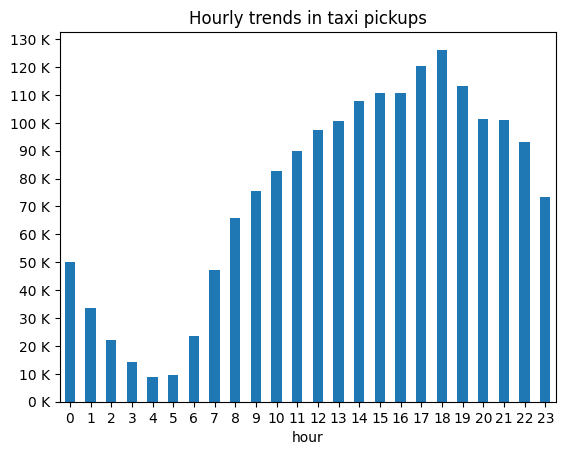

In [169]:
# Find and show the hourly trends in taxi pickups
df.groupby(['hour']).count()['VendorID'].plot.bar()

plt.xticks(rotation=0)

plt.yticks(
    ticks=np.arange(0, 140000, 10000),
    labels=['{0} K'.format(int(x/1000)) for x in np.arange(0, 140000, 10000)],
)

plt.title('Hourly trends in taxi pickups')
plt.show()

In [171]:
df['dayOfWeek'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.dayofweek

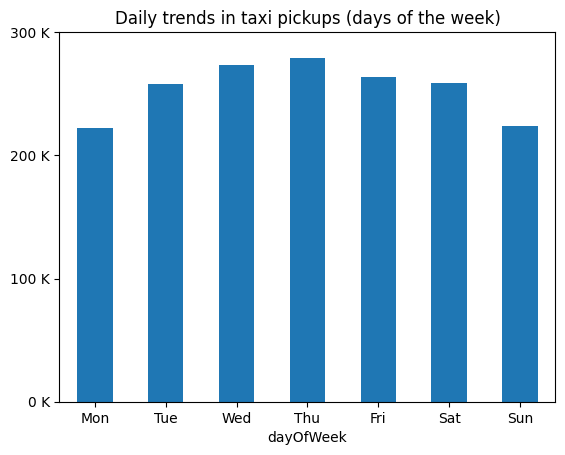

In [173]:
# Find and show the daily trends in taxi pickups (days of the week)

df.groupby(['dayOfWeek']).count()['VendorID'].plot.bar()
plt.xticks(
    ticks=np.array([0, 1, 2, 3, 4, 5, 6]),
    labels= np.array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']),
    rotation=0,
)

plt.yticks(
    ticks=np.arange(0, 400000, 100000),
    labels=['{0} K'.format(int(x/1000)) for x in np.arange(0, 400000, 100000)],
)
plt.title('Daily trends in taxi pickups (days of the week)')
plt.show()

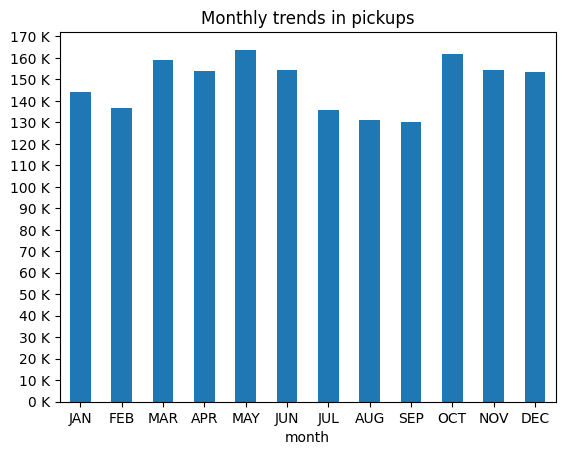

In [175]:
# Show the monthly trends in pickups

df.groupby(['month']).count()['VendorID'].plot.bar()
plt.xticks(
    ticks=np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]),
    labels= np.array(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']),
    rotation=0,
)

plt.yticks(
    ticks=np.arange(0, 180000, 10000),
    labels=['{0} K'.format(int(x/1000)) for x in np.arange(0, 180000, 10000)],
)

plt.title('Monthly trends in pickups')
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [179]:
# Analyse the above parameters

# df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']]
df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']][df['trip_distance'] != 0]

fare_amount  tip_amount  total_amount  trip_distance
0                7.9        3.23         16.13           1.27
1               10.0        2.25         17.25           1.60
2                5.1        2.52         12.62           0.35
3                5.1        2.02         12.12           0.57
4                5.8        1.00         11.80           0.80
...              ...         ...           ...            ...
1778575         12.1        0.00         17.10           1.51
1778576         25.4        6.08         36.48           5.35
1778577          4.4        1.88         11.28           0.28
1778578         12.8        3.56         21.36           2.23
1778579          6.5        2.30         13.80           1.14

[1771875 rows x 4 columns]

In [181]:
df[(df['fare_amount'] == 0) & df['trip_distance'] < 2]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-12-01 00:20:38   2023-12-01 00:25:29              1.0   
1               1  2023-12-01 00:17:05   2023-12-01 00:26:51              1.0   
2               2  2023-12-01 00:12:07   2023-12-01 00:15:28              1.0   
3               2  2023-12-01 00:15:39   2023-12-01 00:18:12              3.0   
4               2  2023-12-01 00:24:30   2023-12-01 00:27:25              2.0   
...           ...                  ...                   ...              ...   
1778575         2  2023-06-30 23:45:36   2023-06-30 23:57:16              1.0   
1778576         2  2023-06-30 23:21:56   2023-06-30 23:42:30              1.0   
1778577         2  2023-06-30 23:10:44   2023-06-30 23:16:27              1.0   
1778578         2  2023-06-30 23:48:46   2023-06-30 23:59:45              1.0   
1778579         2  2023-05-31 23:56:56   2023-06-01 00:00:16              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                 1.27         1.0           164           114             1   
1                 1.60         1.0            68            79             1   
2                 0.35         1.0            48            48             1   
3                 0.57         1.0           164           234             1   
4                 0.80         1.0           161           237             1   
...                ...         ...           ...           ...           ...   
1778575           1.51         1.0           170           246             1   
1778576           5.35         1.0            79             7             1   
1778577           0.28         1.0           249           249             1   
1778578           2.23         1.0           137           249             1   
1778579           1.14         1.0           230            90             1   

         fare_amount  ...  congestion_surcharge  date  hour  month  \
0                7.9  ...                   2.5     1     0     12   
1               10.0  ...                   2.5     1     0     12   
2                5.1  ...                   2.5     1     0     12   
3                5.1  ...                   2.5     1     0     12   
4                5.8  ...                   2.5     1     0     12   
...              ...  ...                   ...   ...   ...    ...   
1778575         12.1  ...                   2.5    30    23      6   
1778576         25.4  ...                   2.5    30    23      6   
1778577          4.4  ...                   2.5    30    23      6   
1778578         12.8  ...                   2.5    30    23      6   
1778579          6.5  ...                   2.5    31    23      5   

         airport_fee   trip_duration  trip_duration_secs  PUYear  DOYear  \
0                0.0 0 days 00:04:51                 291    2023    2023   
1                0.0 0 days 00:09:46                 586    2023    2023   
2                0.0 0 days 00:03:21                 201    2023    2023   
3                0.0 0 days 00:02:33                 153    2023    2023   
4                0.0 0 days 00:02:55                 175    2023    2023   
...              ...             ...                 ...     ...     ...   
1778575          0.0 0 days 00:11:40                 700    2023    2023   
1778576          0.0 0 days 00:20:34                1234    2023    2023   
1778577          0.0 0 days 00:05:43                 343    2023    2023   
1778578          0.0 0 days 00:10:59                 659    2023    2023   
1778579          0.0 0 days 00:03:20                 200    2023    2023   

         dayOfWeek  
0                4  
1                4  
2                4  
3                4  
4                4  
...            ...  
1778575          4  
1778576          4  
1778577          4  
1778578          4  
1778579          2  

[1778580 rows x 25 columns]

<Axes: xlabel='fare_amount'>

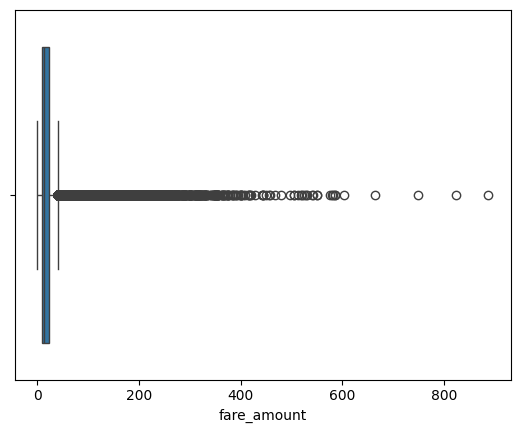

In [183]:
sns.boxplot(data=df, x='fare_amount')

<Axes: xlabel='tip_amount'>

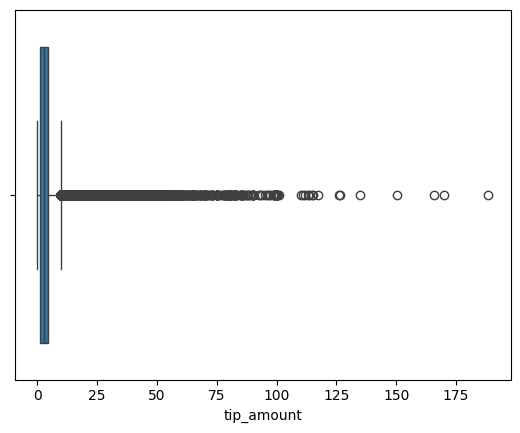

In [184]:
sns.boxplot(data=df, x='tip_amount')

In [185]:
df[df['tip_amount'] > 125]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
87431           2  2023-12-16 10:52:19   2023-12-16 10:52:40              1.0   
183522          1  2023-04-07 00:16:44   2023-04-07 02:10:03              1.0   
477725          2  2023-02-02 13:11:55   2023-02-02 13:20:35              2.0   
513758          1  2023-02-09 20:14:08   2023-02-09 21:20:39              1.0   
816899          1  2023-10-11 22:34:24   2023-10-11 23:29:18              1.0   
1031845         1  2023-08-26 12:07:28   2023-08-26 12:07:44              1.0   
1232502         1  2023-07-09 22:11:10   2023-07-09 23:16:20              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
87431             0.16         1.0            68            68             1   
183522           93.50         2.0           138           265             1   
477725            0.89         1.0           236            43             1   
513758           39.40         2.0           263           197             1   
816899           26.50         5.0           138           265             1   
1031845           5.60         5.0           265           265             1   
1232502          20.20         1.0           162           215             1   

         fare_amount  ...  congestion_surcharge  date  hour  month  \
87431            3.0  ...                   2.5    16    10     12   
183522          70.0  ...                   0.0     7     0      4   
477725           9.3  ...                   2.5     2    13      2   
513758          70.0  ...                   2.5     9    20      2   
816899           0.0  ...                   0.0    11    22     10   
1031845        750.0  ...                   0.0    26    12      8   
1232502         83.5  ...                   2.5     9    22      7   

         airport_fee   trip_duration  trip_duration_secs  PUYear  DOYear  \
87431           0.00 0 days 00:00:21                  21    2023    2023   
183522          1.75 0 days 01:53:19                6799    2023    2023   
477725          0.00 0 days 00:08:40                 520    2023    2023   
513758          0.00 0 days 01:06:31                3991    2023    2023   
816899          1.75 0 days 00:54:54                3294    2023    2023   
1031845         0.00 0 days 00:00:16                  16    2023    2023   
1232502         0.00 0 days 01:05:10                3910    2023    2023   

         dayOfWeek  
87431            5  
183522           4  
477725           3  
513758           3  
816899           2  
1031845          5  
1232502          6  

[7 rows x 25 columns]

In [189]:
df[['trip_distance', 'tip_amount', 'total_amount']][df['tip_amount'] > 125]

trip_distance  tip_amount  total_amount
87431             0.16      126.00        133.00
183522           93.50      166.00        250.80
477725            0.89      188.50        201.80
513758           39.40      126.35        220.00
816899           26.50      135.00        149.69
1031845           5.60      150.20        901.20
1232502          20.20      170.00        258.50

#### There are three entries where 'tip amount' > 125 and the 'trip distance' < 6 miles
#### Seems incorrect dropping these rows

In [192]:
df = df[ ~ ((df['tip_amount'] > 125) & (df['trip_distance'] < 6)) ]

<Axes: xlabel='total_amount'>

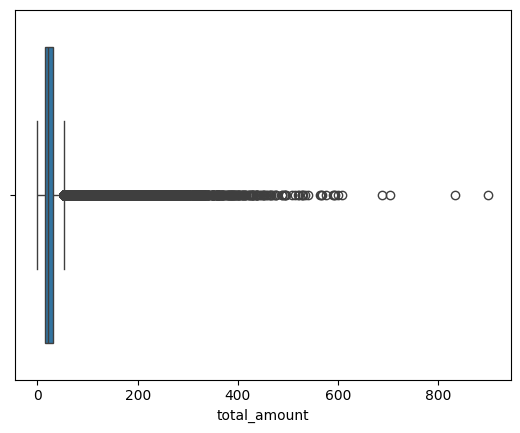

In [194]:
sns.boxplot(data=df, x='total_amount')

In [196]:
df[df['total_amount'] > 600]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
833418          2  2023-10-14 22:24:37   2023-10-15 00:22:03              1.0   
950911          2  2023-08-07 09:12:21   2023-08-07 12:51:34              4.0   
1014268         1  2023-08-22 09:36:38   2023-08-22 09:39:41              2.0   
1405966         2  2023-09-15 14:53:00   2023-09-15 17:45:37              1.0   
1776647         2  2023-06-30 16:26:52   2023-06-30 21:36:49              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
833418          109.35         4.0           132           265             4   
950911          125.12         4.0           132           265             2   
1014268           6.40         5.0           265           265             1   
1405966         150.70         4.0           132           265             4   
1776647         135.61         4.0           132           265             2   

         fare_amount  ...  congestion_surcharge  date  hour  month  \
833418         664.5  ...                   0.0    14    22     10   
950911         824.8  ...                   0.0     7     9      8   
1014268        585.0  ...                   0.0    22     9      8   
1405966        603.6  ...                   0.0    15    14      9   
1776647        887.8  ...                   0.0    30    16      6   

         airport_fee   trip_duration  trip_duration_secs  PUYear  DOYear  \
833418          1.75 0 days 01:57:26                7046    2023    2023   
950911          1.75 0 days 03:39:13               13153    2023    2023   
1014268         0.00 0 days 00:03:03                 183    2023    2023   
1405966         1.75 0 days 02:52:37               10357    2023    2023   
1776647         1.75 0 days 05:09:57               18597    2023    2023   

         dayOfWeek  
833418           5  
950911           0  
1014268          1  
1405966          4  
1776647          4  

[5 rows x 25 columns]

In [198]:
df[['trip_distance', 'tip_amount', 'total_amount']] [df['total_amount'] > 600]

trip_distance  tip_amount  total_amount
833418          109.35         0.0        687.94
950911          125.12         0.0        834.10
1014268           6.40       117.2        703.20
1405966         150.70         0.0        606.85
1776647         135.61         0.0        899.60

In [200]:
df = df[ ~ ((df['total_amount'] > 600) & (df['trip_distance'] < 10 )) ]

In [202]:
df[['trip_distance', 'tip_amount', 'total_amount']] [df['total_amount'] > 600]

trip_distance  tip_amount  total_amount
833418          109.35         0.0        687.94
950911          125.12         0.0        834.10
1405966         150.70         0.0        606.85
1776647         135.61         0.0        899.60

##### There are certain entries where total_amount is greater than 600 but the trip distance is also quite singificant
##### we will not be dropping these entries, as they seem legit.

In [205]:
df[df['trip_distance'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
416             2  2023-12-01 05:55:52   2023-12-01 06:07:13              1.0   
422             1  2023-12-01 05:19:52   2023-12-01 05:51:12              1.0   
464             1  2023-12-01 06:43:19   2023-12-01 06:55:22              1.0   
841             2  2023-12-01 08:41:49   2023-12-01 08:49:45              1.0   
1051            2  2023-12-01 09:54:52   2023-12-01 10:10:28              1.0   
...           ...                  ...                   ...              ...   
1776843         1  2023-06-30 16:15:44   2023-06-30 16:21:40              1.0   
1777608         1  2023-06-30 19:31:48   2023-06-30 19:56:47              1.0   
1778033         2  2023-06-30 21:24:41   2023-06-30 21:42:52              3.0   
1778056         2  2023-06-30 21:43:02   2023-06-30 22:04:46              2.0   
1778326         2  2023-06-30 22:15:47   2023-06-30 22:33:39              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
416                0.0         1.0            48           166             2   
422                0.0         1.0            91            45             1   
464                0.0         1.0           100           161             1   
841                0.0         1.0           237           161             1   
1051               0.0         1.0           236           143             1   
...                ...         ...           ...           ...           ...   
1776843            0.0         1.0           236            43             1   
1777608            0.0         1.0            97            85             1   
1778033            0.0         1.0           264           264             2   
1778056            0.0         1.0           141            50             2   
1778326            0.0         1.0           142            68             1   

         fare_amount  ...  congestion_surcharge  date  hour  month  \
416             10.7  ...                   2.5     1     5     12   
422             31.5  ...                   0.0     1     5     12   
464             11.4  ...                   2.5     1     6     12   
841              7.9  ...                   2.5     1     8     12   
1051            13.5  ...                   2.5     1     9     12   
...              ...  ...                   ...   ...   ...    ...   
1776843          6.5  ...                   2.5    30    16      6   
1777608         21.5  ...                   0.0    30    19      6   
1778033         15.6  ...                   2.5    30    21      6   
1778056         17.7  ...                   2.5    30    21      6   
1778326         14.9  ...                   2.5    30    22      6   

         airport_fee   trip_duration  trip_duration_secs  PUYear  DOYear  \
416              0.0 0 days 00:11:21                 681    2023    2023   
422              0.0 0 days 00:31:20                1880    2023    2023   
464              0.0 0 days 00:12:03                 723    2023    2023   
841              0.0 0 days 00:07:56                 476    2023    2023   
1051             0.0 0 days 00:15:36                 936    2023    2023   
...              ...             ...                 ...     ...     ...   
1776843          0.0 0 days 00:05:56                 356    2023    2023   
1777608          0.0 0 days 00:24:59                1499    2023    2023   
1778033          0.0 0 days 00:18:11                1091    2023    2023   
1778056          0.0 0 days 00:21:44                1304    2023    2023   
1778326          0.0 0 days 00:17:52                1072    2023    2023   

         dayOfWeek  
416              4  
422              4  
464              4  
841              4  
1051             4  
...            ...  
1776843          4  
1777608          4  
1778033          4  
1778056          4  
1778326          4  

[6705 rows x 25 columns]

In [207]:
df[['passenger_count', 'tip_amount', 'total_amount', 'trip_distance']][df['trip_distance'] == 0]

passenger_count  tip_amount  total_amount  trip_distance
416                  1.0        0.00         15.70            0.0
422                  1.0        0.00         33.00            0.0
464                  1.0        3.05         18.45            0.0
841                  1.0        1.78         13.68            0.0
1051                 1.0        2.00         19.50            0.0
...                  ...         ...           ...            ...
1776843              1.0        1.95         14.95            0.0
1777608              1.0        0.00         23.00            0.0
1778033              3.0        0.00         20.60            0.0
1778056              2.0        0.00         22.70            0.0
1778326              1.0        4.98         24.88            0.0

[6705 rows x 4 columns]

In [209]:
df[['passenger_count', 'PULocationID', 'DOLocationID', 'tip_amount', 'total_amount', 'trip_distance']][df['trip_distance'] == 0]

passenger_count  PULocationID  DOLocationID  tip_amount  \
416                  1.0            48           166        0.00   
422                  1.0            91            45        0.00   
464                  1.0           100           161        3.05   
841                  1.0           237           161        1.78   
1051                 1.0           236           143        2.00   
...                  ...           ...           ...         ...   
1776843              1.0           236            43        1.95   
1777608              1.0            97            85        0.00   
1778033              3.0           264           264        0.00   
1778056              2.0           141            50        0.00   
1778326              1.0           142            68        4.98   

         total_amount  trip_distance  
416             15.70            0.0  
422             33.00            0.0  
464             18.45            0.0  
841             13.68            0.0  
1051            19.50            0.0  
...               ...            ...  
1776843         14.95            0.0  
1777608         23.00            0.0  
1778033         20.60            0.0  
1778056         22.70            0.0  
1778326         24.88            0.0  

[6705 rows x 6 columns]

In [211]:
df[['passenger_count', 'PULocationID', 'DOLocationID', 'tip_amount', 'total_amount', 'trip_distance']][ ((df['trip_distance'] == 0) & (df['PULocationID'] != df['DOLocationID'])) ]

passenger_count  PULocationID  DOLocationID  tip_amount  \
416                  1.0            48           166        0.00   
422                  1.0            91            45        0.00   
464                  1.0           100           161        3.05   
841                  1.0           237           161        1.78   
1051                 1.0           236           143        2.00   
...                  ...           ...           ...         ...   
1776726              1.0           239            75        2.85   
1776843              1.0           236            43        1.95   
1777608              1.0            97            85        0.00   
1778056              2.0           141            50        0.00   
1778326              1.0           142            68        4.98   

         total_amount  trip_distance  
416             15.70            0.0  
422             33.00            0.0  
464             18.45            0.0  
841             13.68            0.0  
1051            19.50            0.0  
...               ...            ...  
1776726         17.25            0.0  
1776843         14.95            0.0  
1777608         23.00            0.0  
1778056         22.70            0.0  
1778326         24.88            0.0  

[4806 rows x 6 columns]

#### We have some entries where the trip distance is 0 but the pickup and drop locations are different
#### Seems odd, best to drop these 

In [214]:
df = df[ ~ ((df['trip_distance'] == 0) & (df['PULocationID'] != df['DOLocationID'])) ]

In [216]:
df[['passenger_count', 'PULocationID', 'DOLocationID', 'tip_amount', 'total_amount', 'trip_distance']][ df['trip_distance'] == 0 ]

passenger_count  PULocationID  DOLocationID  tip_amount  \
1064                 1.0           140           140       10.00   
1450                 1.0           145           145        0.00   
1775                 1.0           264           264        5.46   
11400                4.0            68            68        3.14   
12885                1.0           264           264        5.00   
...                  ...           ...           ...         ...   
1772188              1.0           264           264        3.72   
1774374              1.0           163           163        0.00   
1775694              2.0           236           236        2.10   
1776320              1.0           262           262       18.50   
1778033              3.0           264           264        0.00   

         total_amount  trip_distance  
1064            19.80            0.0  
1450             6.60            0.0  
1775            32.76            0.0  
11400           18.84            0.0  
12885           67.33            0.0  
...               ...            ...  
1772188         22.32            0.0  
1774374          8.70            0.0  
1775694         12.60            0.0  
1776320         92.50            0.0  
1778033         20.60            0.0  

[1899 rows x 6 columns]

In [218]:
(df[df['trip_distance'] == 0].shape[0] / df.shape[0]) * 100

0.10706010362110081

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

### We have certain records where the trip_distance is 0 but they make up about 1% of the data

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [223]:
# Create a df with non zero entries for the selected parameters.
non_zero_trip_df = df[df['trip_distance'] > 0]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [226]:
non_zero_trip_df[['total_amount', 'month']].groupby('month').sum()

total_amount
month              
1        3922056.08
2        3719239.05
3        4472427.22
4        4389833.44
5        4795879.63
6        4503430.06
7        3913821.46
8        3809838.63
9        3911180.97
10       4811391.51
11       4501685.58
12       4440713.24

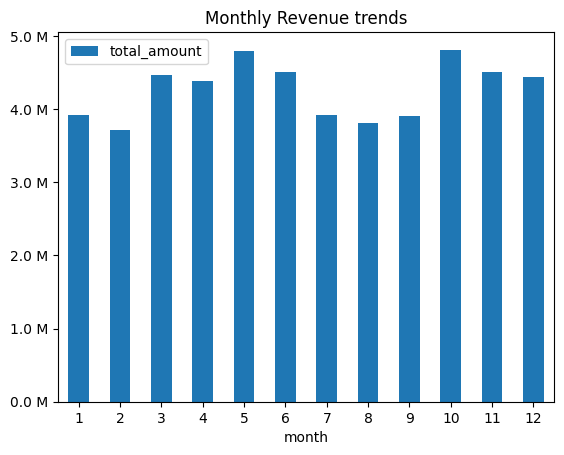

In [228]:
# Group data by month and analyse monthly revenue

non_zero_trip_df[['total_amount', 'month']].groupby('month').sum().plot.bar()
plt.yticks(
    ticks=np.arange(0, 6000000, 1000000), 
    labels=["{0} M".format(x/1000000) for x in np.arange(0, 6000000, 1000000)]
)
plt.xticks(rotation=0)
plt.title('Monthly Revenue trends')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [231]:
# Calculate proportion of each quarter
def check_quater(x):
    if x <= 3:
        return 1
    elif x > 3 and x <= 6:
        return 2
    elif x > 6 and x <= 9:
        return 3
    else:
        return 4

In [233]:
non_zero_trip_df['quater'] = non_zero_trip_df['month'].apply(check_quater)

In [235]:
non_zero_trip_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:20:38   2023-12-01 00:25:29              1.0   
1         1  2023-12-01 00:17:05   2023-12-01 00:26:51              1.0   
2         2  2023-12-01 00:12:07   2023-12-01 00:15:28              1.0   
3         2  2023-12-01 00:15:39   2023-12-01 00:18:12              3.0   
4         2  2023-12-01 00:24:30   2023-12-01 00:27:25              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.27         1.0           164           114             1   
1           1.60         1.0            68            79             1   
2           0.35         1.0            48            48             1   
3           0.57         1.0           164           234             1   
4           0.80         1.0           161           237             1   

   fare_amount  ...  date  hour  month  airport_fee   trip_duration  \
0          7.9  ...     1     0     12          0.0 0 days 00:04:51   
1         10.0  ...     1     0     12          0.0 0 days 00:09:46   
2          5.1  ...     1     0     12          0.0 0 days 00:03:21   
3          5.1  ...     1     0     12          0.0 0 days 00:02:33   
4          5.8  ...     1     0     12          0.0 0 days 00:02:55   

   trip_duration_secs  PUYear  DOYear  dayOfWeek  quater  
0                 291    2023    2023          4       4  
1                 586    2023    2023          4       4  
2                 201    2023    2023          4       4  
3                 153    2023    2023          4       4  
4                 175    2023    2023          4       4  

[5 rows x 26 columns]

In [237]:
non_zero_trip_df[['quater', 'total_amount']].groupby('quater').sum()

total_amount
quater              
1        12113722.35
2        13689143.13
3        11634841.06
4        13753790.33

In [239]:
dfg = non_zero_trip_df[['quater', 'total_amount']].groupby('quater').sum()

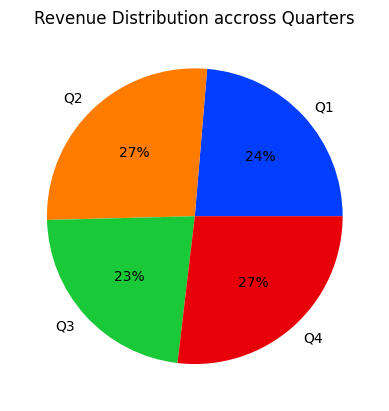

In [241]:
plt.pie(
    dfg['total_amount'],
    labels=['Q1', 'Q2', 'Q3', 'Q4'], autopct='%.0f%%',
    colors=sns.color_palette('bright')
)

plt.title("Revenue Distribution accross Quarters")
plt.show()

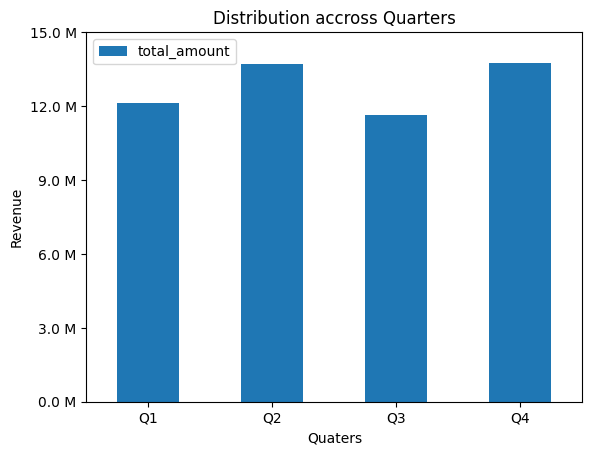

In [243]:
dfg.plot.bar()

plt.title('Distribution accross Quarters')
plt.xticks(
    ticks=np.array([0, 1, 2, 3]),
    labels=np.array(['Q1', 'Q2', 'Q3', 'Q4']),
    rotation=0)
plt.xlabel('Quaters')

plt.yticks(
    ticks=np.arange(0, 16000000, 3000000),
    labels=['{0} M'.format(x/1000000) for x in np.arange(0, 16000000, 3000000)],
)
plt.ylabel('Revenue')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [246]:
fare_to_distance_corr = df[['fare_amount', 'trip_distance']].corr()
fare_to_distance_corr

fare_amount  trip_distance
fare_amount        1.00000        0.17336
trip_distance      0.17336        1.00000

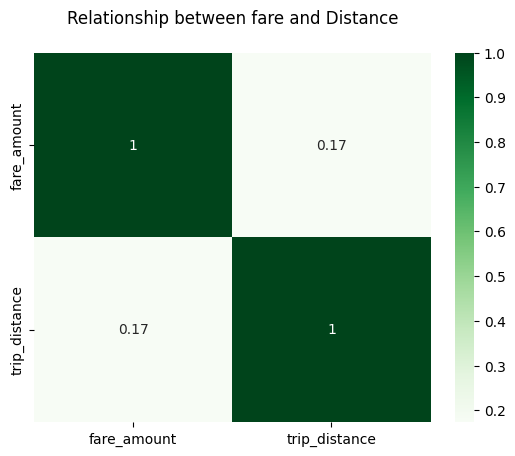

In [248]:
# Show how trip fare is affected by distance
sns.heatmap(fare_to_distance_corr, annot=True, cmap='Greens')

plt.title('Relationship between fare and Distance\n')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [251]:
# Show relationship between fare and trip duration
fare_to_duration_corr = df[['fare_amount', 'trip_duration']].corr()
fare_to_duration_corr

fare_amount  trip_duration
fare_amount       1.000000       0.266406
trip_duration     0.266406       1.000000

<Axes: >

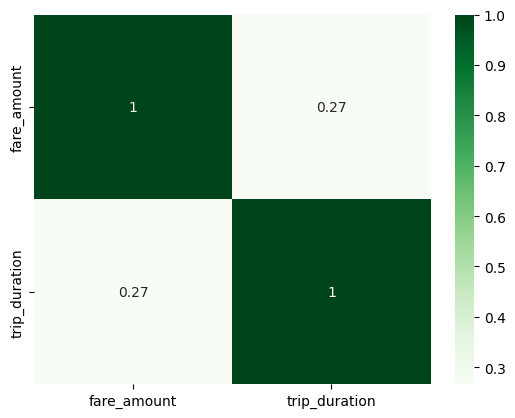

In [253]:
sns.heatmap(fare_to_duration_corr, annot=True, cmap='Greens')

In [255]:
# Show relationship between fare and number of passengers
fare_to_pcount_corr = df[['fare_amount', 'passenger_count']].corr()
fare_to_pcount_corr

fare_amount  passenger_count
fare_amount         1.000000         0.044333
passenger_count     0.044333         1.000000

<Axes: >

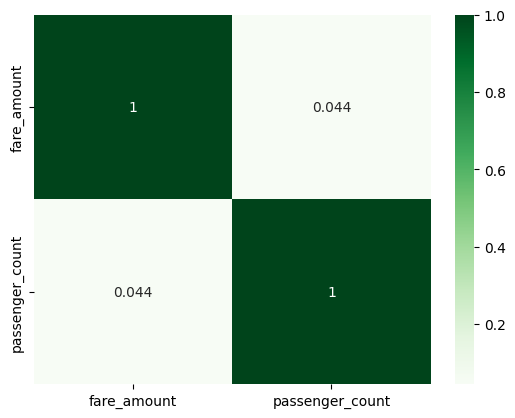

In [257]:
sns.heatmap(fare_to_pcount_corr, annot=True, cmap='Greens')

In [259]:
# Show relationship between tip and trip distance
tip_to_pcount_corr = df[['tip_amount', 'passenger_count']].corr()
tip_to_pcount_corr

tip_amount  passenger_count
tip_amount         1.000000         0.007608
passenger_count    0.007608         1.000000

<Axes: >

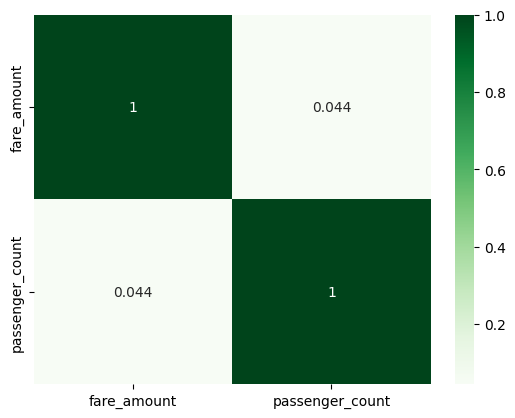

In [261]:
sns.heatmap(fare_to_pcount_corr, annot=True, cmap='Greens')

In [263]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:20:38   2023-12-01 00:25:29              1.0   
1         1  2023-12-01 00:17:05   2023-12-01 00:26:51              1.0   
2         2  2023-12-01 00:12:07   2023-12-01 00:15:28              1.0   
3         2  2023-12-01 00:15:39   2023-12-01 00:18:12              3.0   
4         2  2023-12-01 00:24:30   2023-12-01 00:27:25              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.27         1.0           164           114             1   
1           1.60         1.0            68            79             1   
2           0.35         1.0            48            48             1   
3           0.57         1.0           164           234             1   
4           0.80         1.0           161           237             1   

   fare_amount  ...  congestion_surcharge  date  hour  month  airport_fee  \
0          7.9  ...                   2.5     1     0     12          0.0   
1         10.0  ...                   2.5     1     0     12          0.0   
2          5.1  ...                   2.5     1     0     12          0.0   
3          5.1  ...                   2.5     1     0     12          0.0   
4          5.8  ...                   2.5     1     0     12          0.0   

    trip_duration  trip_duration_secs  PUYear  DOYear  dayOfWeek  
0 0 days 00:04:51                 291    2023    2023          4  
1 0 days 00:09:46                 586    2023    2023          4  
2 0 days 00:03:21                 201    2023    2023          4  
3 0 days 00:02:33                 153    2023    2023          4  
4 0 days 00:02:55                 175    2023    2023          4  

[5 rows x 25 columns]

In [265]:
c = df[['fare_amount', 'tip_amount', 'passenger_count', 'trip_duration']].corr()

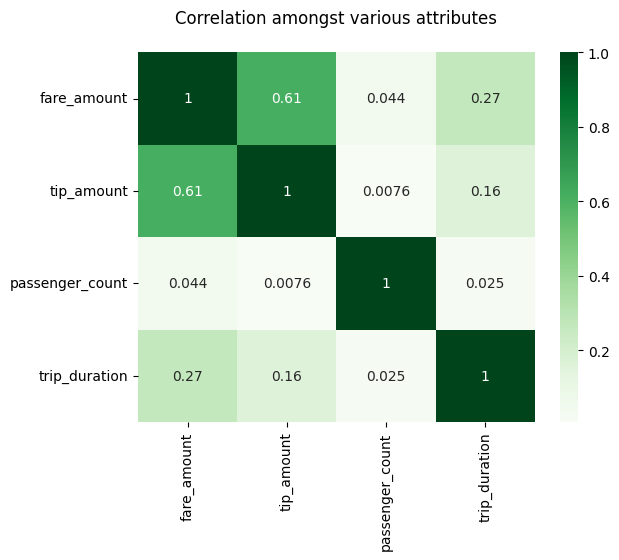

In [267]:
sns.heatmap(c, cmap='Greens', annot=True)

plt.title('Correlation amongst various attributes\n')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [270]:
non_zero_trip_df.groupby(['payment_type']).count()['VendorID']

payment_type
1    1448474
2     305035
3       6294
4      12068
Name: VendorID, dtype: int64

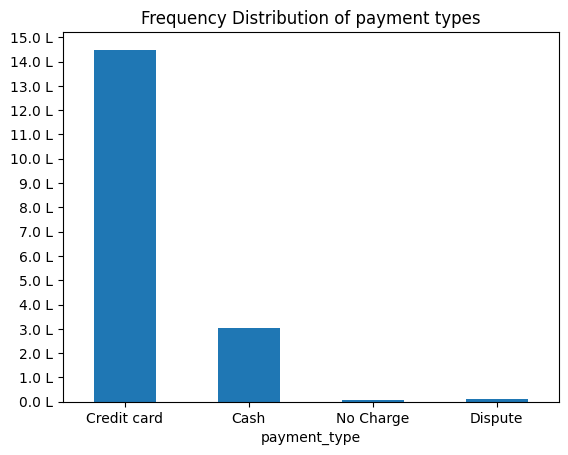

In [272]:
# Analyse the distribution of different payment types (payment_type).

non_zero_trip_df.groupby(['payment_type']).count()['VendorID'].plot.bar()

plt.xticks(
    ticks=np.array([0, 1, 2, 3]),
    labels=np.array(['Credit card', 'Cash', 'No Charge', 'Dispute']),
    rotation=0,
)
# 1448562

# ['{0} M'.format(x/1000000) for x in np.arange(0, 16000000, 3000000)],

plt.yticks(
    ticks=np.arange(0, 1600000, 100000),
    labels=['{0} L'.format(x/100000) for x in np.arange(0, 1600000, 100000)],
)
plt.title('Frequency Distribution of payment types')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [278]:
# pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [281]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('./Datasets and Dictionary/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

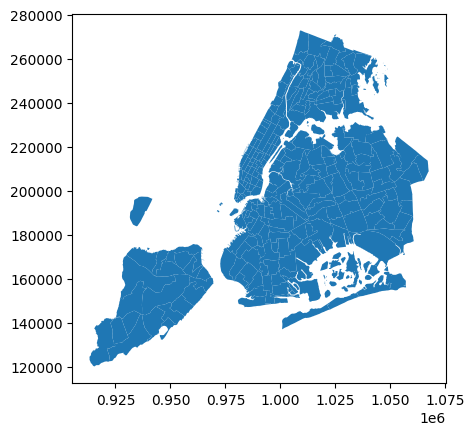

In [284]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [288]:
# Merge zones and trip records using locationID and PULocationID
dfm = non_zero_trip_df.merge(
    zones, 
    how='left', 
    left_on='PULocationID', 
    right_on='LocationID',
)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [291]:
# Group data by location and calculate the number of trips
dfm.groupby('PULocationID').agg(
    Total_Trips=('tpep_pickup_datetime', 'count')
)

Total_Trips
PULocationID             
1                      52
2                       1
3                       2
4                    1699
6                      28
...                   ...
261                  9281
262                 23232
263                 33539
264                 15828
265                   319

[246 rows x 1 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [294]:
# Merge trip counts back to the zones GeoDataFrame
zm = zones.merge(
    dfm.groupby('PULocationID').count()['VendorID'],
    how='left',
    left_on='LocationID',
    right_on='PULocationID'
).rename(columns={'VendorID': 'Total_trips'})

In [296]:
zm.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   Total_trips  
0         52.0  
1          1.0  
2          2.0  
3       1699.0  
4          NaN

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

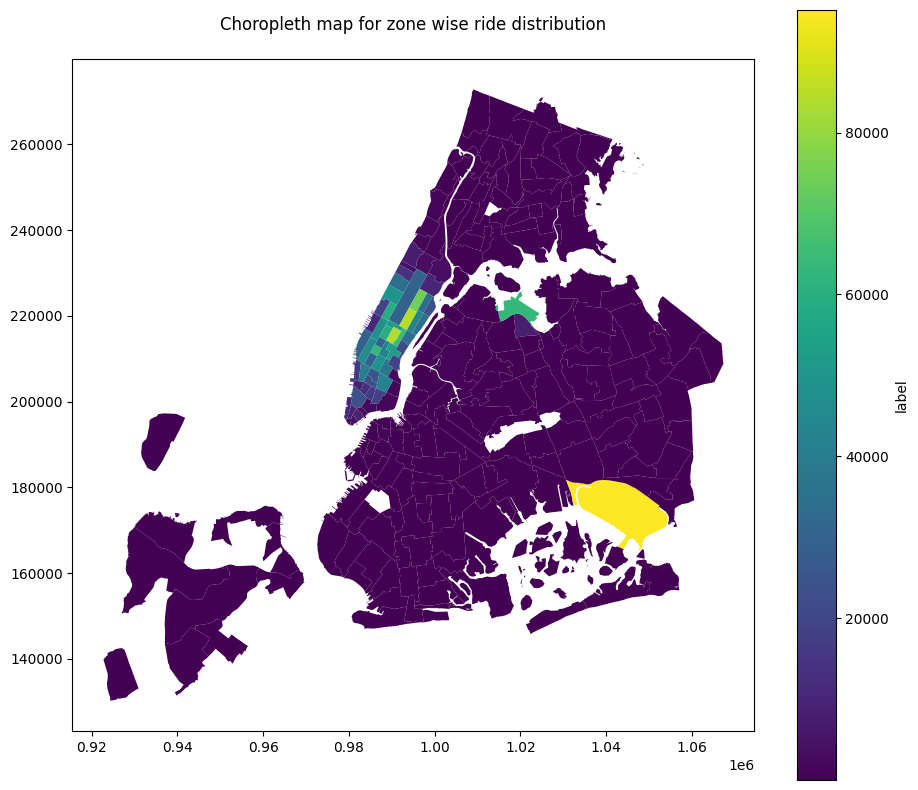

In [301]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (11, 10))

# Plot the map and display it
zm.plot(
    column='Total_trips',
    ax= ax,
    legend=True,
    legend_kwds = {'label': "label", 'orientation': "vertical"}
)

plt.title('Choropleth map for zone wise ride distribution\n')

plt.show()

In [303]:
# can you try displaying the zones DF sorted by the number of trips?
zm.sort_values(by='Total_trips', ascending=False)

OBJECTID  Shape_Leng  Shape_Area                      zone  LocationID  \
131       132    0.245479    0.002038               JFK Airport         132   
236       237    0.042213    0.000096     Upper East Side South         237   
160       161    0.035804    0.000072            Midtown Center         161   
235       236    0.044252    0.000103     Upper East Side North         236   
161       162    0.035270    0.000048              Midtown East         162   
..        ...         ...         ...                       ...         ...   
171       172    0.118476    0.000658    New Dorp/Midland Beach         172   
186       187    0.126868    0.000421             Port Richmond         187   
213       214    0.135300    0.000812  South Beach/Dongan Hills         214   
244       245    0.095983    0.000466             West Brighton         245   
250       251    0.137711    0.000626               Westerleigh         251   

           borough                                           geometry  \
131         Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236      Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160      Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235      Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161      Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
..             ...                                                ...   
171  Staten Island  POLYGON ((960204.812 146820.751, 960103.437 14...   
186  Staten Island  MULTIPOLYGON (((946964.115 173161.64, 946977.8...   
213  Staten Island  POLYGON ((960669.201 156319.132, 960902.551 15...   
244  Staten Island  POLYGON ((957085.564 172591.26, 957142.385 172...   
250  Staten Island  POLYGON ((947868.004 169247.734, 948000.981 16...   

     Total_trips  
131      95146.0  
236      84721.0  
160      83722.0  
235      74704.0  
161      64797.0  
..           ...  
171          NaN  
186          NaN  
213          NaN  
244          NaN  
250          NaN  

[263 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


You can consider the following points:

* Busiest hours, days and months
  - 17-19 hrs are the busiest hours during the day
  - Thursady is the busiest day
  - June, October, March are the busiest months
  
* Trends in revenue collected
  - Revenue accross the year is somewhat consistent
  - min being in the months of Feb, July, Aug and Sept
  - peaking in the months of May, October
  
* Trends in quarterly revenue
  - Quaterly revenue distribution is majorly consistent
    with minor variations in Q1 and Q3 and
    being consistent in Q2 and Q4 

* How fare depends on trip distance, trip duration and passenger counts
  - fare_amount and trip_distance:   weak correlation with corr of 0.17
  - fare_amount and trip_duration:   strongest correlation with corr of 0.27
  - fare_amount and passenger_count: weakest correlation with corr of 0.044
  
* How tip amount depends on trip distance
  - tip_amount and trip_distance:    weak correlation with corr of 0.11

* Busiest zones
  - Queens, 132
  - Manhattan, 237
  - Manhattan, 161
  - Manhattan, 236
  - Manhattan, 162

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [305]:
non_zero_trip_df['speed_mph'] = round(non_zero_trip_df['trip_distance'] / (non_zero_trip_df['trip_duration_secs'] / 3600), 2)

We will check for trips with speed in miles/hour to be greater than 120
#### A vehicle driving in the city cannot have average speed greater than 120 miles/hour 

In [308]:
non_zero_trip_df = non_zero_trip_df[non_zero_trip_df['speed_mph'] <= 120]

### Selecting entries which have a duration of greater than a min

In [311]:
non_zero_trip_df = non_zero_trip_df[non_zero_trip_df['trip_duration_secs'] > 60]

In [313]:
non_zero_trip_df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'PULocationID', 'DOLocationID', 'trip_duration', 'trip_duration_secs', 'speed_mph']][non_zero_trip_df['speed_mph'] >  100]

tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  \
476521   2023-02-02 08:08:52   2023-02-02 08:22:05          23.24   
872889   2023-10-22 10:04:37   2023-10-22 10:05:38           1.90   
950199   2023-08-06 23:37:55   2023-08-06 23:45:14          13.85   
1151817  2023-01-21 23:29:41   2023-01-21 23:30:42           1.70   
1205228  2023-07-02 17:37:53   2023-07-02 17:39:15           2.70   
1275032  2023-07-19 08:02:13   2023-07-19 08:03:37           2.60   
1640359  2023-06-03 21:18:48   2023-06-03 21:26:50          13.40   

         PULocationID  DOLocationID   trip_duration  trip_duration_secs  \
476521            132           261 0 days 00:13:13                 793   
872889            239           239 0 days 00:01:01                  61   
950199             93           145 0 days 00:07:19                 439   
1151817           249           249 0 days 00:01:01                  61   
1205228           239           239 0 days 00:01:22                  82   
1275032            68            68 0 days 00:01:24                  84   
1640359           263           237 0 days 00:08:02                 482   

         speed_mph  
476521      105.50  
872889      112.13  
950199      113.58  
1151817     100.33  
1205228     118.54  
1275032     111.43  
1640359     100.08

In [315]:
# Find routes which have the slowest speeds at different times of the day
non_zero_trip_df.groupby(['PULocationID', 'DOLocationID', 'hour']).agg(
    avg_speed=('speed_mph', 'mean')
).sort_values(by='avg_speed', ascending=True).reset_index().head(10)

PULocationID  DOLocationID  hour  avg_speed
0           260           260    20       0.00
1           132             6    12       0.01
2           260           260     0       0.01
3            66            68    15       0.02
4           161            63    19       0.02
5           264           132     1       0.05
6           249           145    13       0.06
7           162           132    23       0.09
8           146           141    20       0.11
9           263           193     8       0.12

How does identifying high-traffic, high-demand routes help us?
#### We can provide better taxi support in high demand regions

In [318]:
dfg = non_zero_trip_df.groupby(['PULocationID', 'DOLocationID', 'hour']).agg(
    avg_speed=('speed_mph', 'mean'),
    count=('trip_duration', 'count'),
    avg_trip_duration_secs=('trip_duration_secs', 'mean')
)

In [320]:
dfg.head()

avg_speed  count  avg_trip_duration_secs
PULocationID DOLocationID hour                                          
1            1            7          3.12      1                   104.0
                          13        14.12      1                   102.0
                          14        16.14      1                  3937.0
                          17         0.58      1                   748.0
                          18        11.83      1                    70.0

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

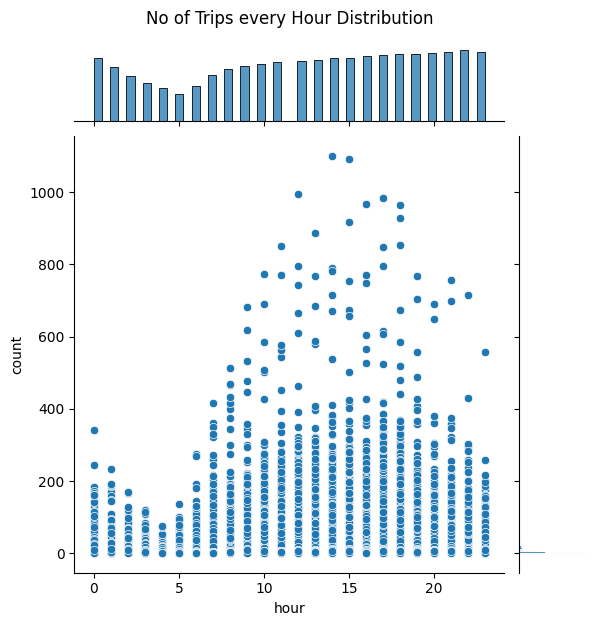

In [323]:
# Visualise the number of trips per hour and find the busiest hour
sns.jointplot(data=dfg, x='hour', y='count')
plt.title('No of Trips every Hour Distribution\n\n\n\n\n')
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

In [325]:
dfg.sort_values(by='count', ascending=False)

avg_speed  count  avg_trip_duration_secs
PULocationID DOLocationID hour                                          
237          236          14     7.873373   1100              557.888182
                          15     8.357198   1092              552.158425
236          237          12     7.127837    994              767.952716
237          236          17    10.222124    984              504.957317
                          16     9.066918    967              468.471562
...                                   ...    ...                     ...
144          255          10     8.270000      1             1494.000000
                          12     9.980000      1              970.000000
             256          8     10.480000      1             1065.000000
                          10    14.080000      1              657.000000
             55           23    24.140000      1             2134.000000

[118975 rows x 3 columns]

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [329]:
# Scale up the number of trips
# we took 5% of the data to sample  
# Fill in the value of your sampling fraction and use that to scale up the numbers
scalling_fraction = 100 / 5

dfg.sort_values(by='count', ascending=False).head(10)['count'] * scalling_fraction

PULocationID  DOLocationID  hour
237           236           14      22000.0
                            15      21840.0
236           237           12      19880.0
237           236           17      19680.0
                            16      19340.0
236           237           18      19300.0
264           264           18      18600.0
236           237           15      18360.0
237           236           13      17720.0
                            18      17060.0
Name: count, dtype: float64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [332]:
# Compare traffic trends for the week days and weekends

In [334]:
# traffic trends during the week

dfwd = non_zero_trip_df.where(non_zero_trip_df['dayOfWeek'] < 5).groupby(['dayOfWeek']).agg(
    avg_speed=('speed_mph', 'mean'),
    count=('trip_duration', 'count'),
    avg_trip_duration_secs=('trip_duration_secs', 'mean')
).sort_values(by='count', ascending=False)

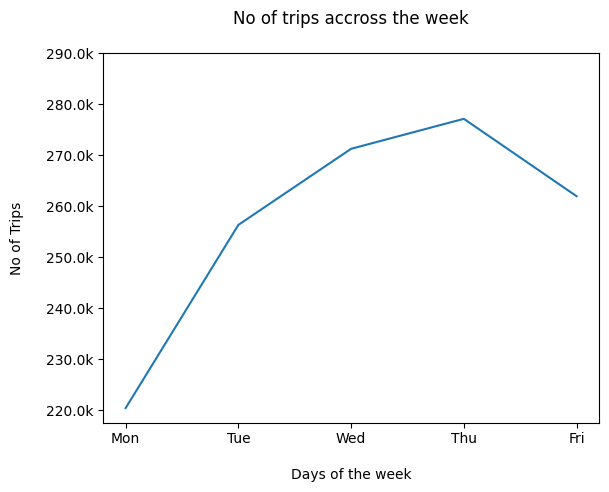

In [336]:
sns.lineplot(data=dfwd, x='dayOfWeek', y='count')

plt.yticks(
    ticks=np.arange(220000, 300000, 10000),
    labels=["{0}k".format(x/1000) for x in np.arange(220000, 300000, 10000)]
)

plt.xticks(
    ticks=np.array([0, 1, 2, 3, 4]),
    labels=np.array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
)

plt.xlabel("\nDays of the week")
plt.ylabel('No of Trips\n')
plt.title('No of trips accross the week\n')
plt.show()

In [338]:
dfwn = non_zero_trip_df.where(non_zero_trip_df['dayOfWeek'] > 4).groupby(['dayOfWeek']).agg(
    avg_speed=('speed_mph', 'mean'),
    count=('trip_duration', 'count'),
    avg_trip_duration_secs=('trip_duration_secs', 'mean')
).sort_values(by='count', ascending=False)

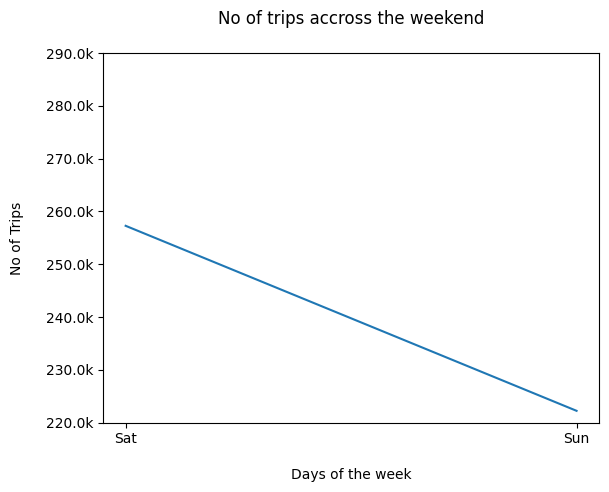

In [340]:
sns.lineplot(data=dfwn, x='dayOfWeek', y='count')

plt.yticks(
    ticks=np.arange(220000, 300000, 10000),
    labels=["{0}k".format(x/1000) for x in np.arange(220000, 300000, 10000)]
)

plt.xticks(
    ticks=np.array([5, 6]),
    labels=np.array(['Sat', 'Sun'])
)

plt.xlabel("\nDays of the week")
plt.ylabel('No of Trips\n')

plt.title('No of trips accross the weekend\n')
plt.show()

In [342]:
dft = non_zero_trip_df.groupby(['dayOfWeek']).agg(
    avg_speed=('speed_mph', 'mean'),
    count=('trip_duration', 'count'),
    avg_trip_duration_secs=('trip_duration_secs', 'mean')
).sort_values(by='count', ascending=False)

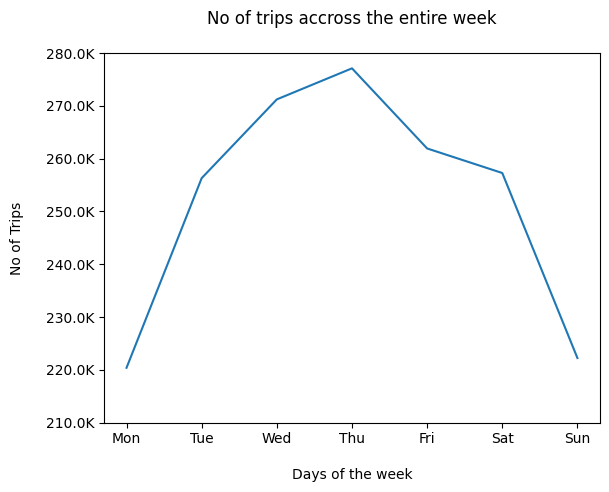

In [344]:
sns.lineplot(data=dft, x='dayOfWeek', y='count')
plt.xticks(
    ticks=np.array([0, 1, 2, 3, 4, 5, 6]),
    labels=np.array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
)

plt.yticks(
    ticks=np.arange(210000, 290000, 10000),
    labels=['{0}K'.format(x/1000) for x in np.arange(210000, 290000, 10000)]
)

plt.xlabel("\nDays of the week")
plt.ylabel('No of Trips\n')

plt.title('No of trips accross the entire week\n')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

We can observe that there is a upward trend till Thursday and a downward trend during the weekends

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [349]:
df_pu_gb = dfm.groupby(['PULocationID', 'hour']).agg(
    Total_trips=('trip_duration', 'count')
).sort_values(by='Total_trips', ascending=False).head(10).reset_index()

In [351]:
# Find top 10 pickup zones
df_pu_gb.merge(
    zm, 
    how='left', 
    left_on='PULocationID', 
    right_on='LocationID',
).rename(
    columns={
        'LocationID_y': 'LocationID', 
        'borough_y': 'borough', 
        'Total_trips_x': 'Total_trips',
    }
)[['PULocationID', 'borough', 'hour', 'Total_trips']].head(10)

PULocationID    borough  hour  Total_trips
0           161  Manhattan    18         7149
1           161  Manhattan    17         7029
2           132     Queens    16         6768
3           132     Queens    22         6675
4           237  Manhattan    14         6558
5           161  Manhattan    19         6551
6           237  Manhattan    15         6521
7           132     Queens    15         6378
8           237  Manhattan    17         6355
9           132     Queens    17         6347

In [353]:
df_do_gb = dfm.groupby(['DOLocationID', 'hour']).agg(
    Total_trips=('trip_duration', 'count')
).sort_values(by='Total_trips', ascending=False).head(10).reset_index()

In [355]:
# Top 10 dropoff zones
df_do_gb.merge(
    zm, 
    how='left', 
    left_on='DOLocationID', 
    right_on='LocationID',
).rename(
    columns={
        'LocationID_y': 'LocationID', 
        'borough_y': 'borough',
        'Total_trips_x': 'Total_trips',
    }
)[['DOLocationID', 'borough', 'hour', 'Total_trips']].head(10)

DOLocationID    borough  hour  Total_trips
0           237  Manhattan    18         5977
1           236  Manhattan    15         5931
2           236  Manhattan    14         5919
3           237  Manhattan    12         5834
4           236  Manhattan    17         5804
5           237  Manhattan    15         5776
6           236  Manhattan    18         5755
7           237  Manhattan    14         5607
8           236  Manhattan    16         5525
9           237  Manhattan    17         5491

In [357]:
top_10_pick_zone_by_hour = dfm.groupby(['hour', 'PULocationID']).agg(
    total_trips=('tpep_pickup_datetime', 'count')
).sort_values(by='total_trips', ascending=False).reset_index().head(10)

In [359]:
bottom_10_pick_zone_by_hour = dfm.groupby(['hour', 'PULocationID']).agg(
    total_trips=('tpep_pickup_datetime', 'count')
).sort_values(by='total_trips', ascending=False).reset_index().tail(10)

In [361]:
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

In [363]:
top_10_pick_zones = top_10_pick_zone_by_hour.merge(
    zones,
    left_on='PULocationID',
    right_on='LocationID'
).drop(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'borough', 'geometry', 'PULocationID'], axis=1)

In [365]:
bottom_10_pick_zones = bottom_10_pick_zone_by_hour.merge(
    zones,
    left_on='PULocationID',
    right_on='LocationID'
).drop(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'borough', 'geometry', 'PULocationID'], axis=1)

In [367]:
top_10_pick_zones

hour  total_trips                   zone  LocationID
0    18         7149         Midtown Center         161
1    17         7029         Midtown Center         161
2    16         6768            JFK Airport         132
3    22         6675            JFK Airport         132
4    14         6558  Upper East Side South         237
5    19         6551         Midtown Center         161
6    15         6521  Upper East Side South         237
7    15         6378            JFK Airport         132
8    17         6355  Upper East Side South         237
9    17         6347            JFK Airport         132

In [369]:
bottom_10_pick_zones

hour  total_trips                               zone  LocationID
0    18            1  University Heights/Morris Heights         235
1    13            1                      Fresh Meadows          98
2     5            1                             Inwood         127
3    18            1                     West Concourse         247
4     5            1                         Highbridge         119
5    18            1      Westchester Village/Unionport         250
6    13            1               Flatbush/Ditmas Park          89
7    11            1                      College Point          53
8    18            1                    Windsor Terrace         257
9    19            1                         Co-Op City          51

In [371]:
dfm.groupby(['hour', 'PULocationID', 'VendorID']).agg(
    avg_fare_per_hour_per_vendor=('fare_amount', 'mean')
).sort_values('avg_fare_per_hour_per_vendor', ascending=False).head(10)

avg_fare_per_hour_per_vendor
hour PULocationID VendorID                              
3    156          2                               346.00
16   29           2                               300.00
12   8            2                               224.00
10   188          2                               219.65
12   11           2                               213.00
0    247          2                               210.00
1    208          2                               200.00
10   165          2                               200.00
13   207          1                               200.00
21   15           2                               198.15

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [374]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
df_pu = non_zero_trip_df.groupby('PULocationID').agg(
    pickup_count=('trip_distance', 'count')
).reset_index()

In [376]:
df_do = non_zero_trip_df.groupby('DOLocationID').agg(
    dropof_count=('trip_distance', 'count'),
).reset_index()

In [378]:
location_df = df_pu.merge(
    df_do, 
    how='left', 
    left_on='PULocationID', 
    right_on='DOLocationID', 
)

location_df.head()

PULocationID  pickup_count  DOLocationID  dropof_count
0             1            20           1.0        5042.0
1             2             1           2.0           4.0
2             3             2           3.0         124.0
3             4          1690           4.0        6788.0
4             6             1           6.0          24.0

In [380]:
location_df['ratio'] = round(location_df['pickup_count'] / location_df['dropof_count'], 2)

In [382]:
# Top 10 zones by pickup/drop ratio
location_df.drop('DOLocationID', axis=1, inplace=True)

In [384]:
location_df = location_df.rename(columns={'PULocationID': 'LocationID'})

In [386]:
location_df.sort_values(by='ratio', ascending=False).head(10)

LocationID  pickup_count  dropof_count  ratio
63           70          8008         827.0   9.68
116         132         94273       18711.0   5.04
122         138         63300       21360.0   2.96
169         186         62589       38858.0   1.61
100         114         23595       17041.0   1.38
227         249         40368       29927.0   1.35
39           43         29698       21934.0   1.35
146         162         64669       50707.0   1.28
90          100         29900       24780.0   1.21
145         161         83559       69873.0   1.20

In [388]:
# Bottom 10 zones by pickup/drop ratio
location_df.sort_values(by='ratio', ascending=False).tail(10)

LocationID  pickup_count  dropof_count  ratio
204         225            22        1510.0   0.01
106         122             1         129.0   0.01
123         139             4         279.0   0.01
133         149             3         201.0   0.01
155         171             3         275.0   0.01
161         178             1         140.0   0.01
185         205             4         458.0   0.01
0             1            20        5042.0   0.00
93          105             1           NaN    NaN
181         199             2           NaN    NaN

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [391]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_df = non_zero_trip_df[ (non_zero_trip_df['hour'] >= 23) | (non_zero_trip_df['hour'] < 5) ]

In [393]:
night_df['hour'].value_counts()

hour
23    72899
0     49695
1     33267
2     21878
3     14175
4      8835
Name: count, dtype: int64

In [395]:
# Top 10 night pickup zones
dfn_pu = night_df.groupby(['PULocationID', 'hour']).agg(
    count=('trip_distance', 'count')
).sort_values(by='count', ascending=False).head(10).reset_index()

In [397]:
dfn_pu.merge(
    zones, 
    how='left', 
    left_on='PULocationID', 
    right_on='LocationID',
)[['LocationID','hour', 'borough', 'count']]

LocationID  hour    borough  count
0         132    23     Queens   6182
1         132     0     Queens   3825
2         138    23     Queens   3733
3         249    23  Manhattan   3570
4          79     0  Manhattan   3492
5          79    23  Manhattan   3401
6          79     1  Manhattan   3290
7         249     0  Manhattan   3114
8         230    23  Manhattan   3062
9          48    23  Manhattan   3031

In [399]:
# Top 10 night dropoff zones
dfn_do = night_df.groupby('DOLocationID').agg(count=('trip_distance', 'count')).sort_values(by='count', ascending=False).head(10)

In [401]:
dfn_do.merge(zones, how='left', left_on='DOLocationID', right_on='LocationID')[['LocationID', 'borough', 'count']]

LocationID    borough  count
0          79  Manhattan   8052
1          48  Manhattan   6579
2         170  Manhattan   6071
3          68  Manhattan   5350
4         107  Manhattan   5317
5         141  Manhattan   4998
6         263  Manhattan   4817
7         249  Manhattan   4753
8         230  Manhattan   4312
9         229  Manhattan   4207

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [404]:
# Filter for night hours (11 PM to 5 AM)
day_df = non_zero_trip_df[ (non_zero_trip_df['hour'] >= 5) & (non_zero_trip_df['hour'] < 23) ]

In [406]:
night_df['hour'].value_counts()

hour
23    72899
0     49695
1     33267
2     21878
3     14175
4      8835
Name: count, dtype: int64

In [408]:
day_df['hour'].value_counts()

hour
18    125409
17    119695
19    112612
16    109976
15    109788
14    107028
20    100639
21    100385
13     99944
12     96610
22     92620
11     89178
10     82044
9      74895
8      65466
7      46791
6      23238
5       9246
Name: count, dtype: int64

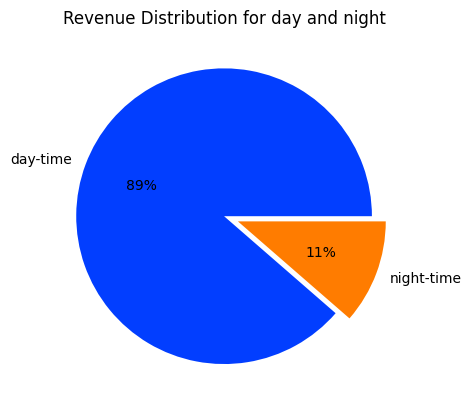

In [410]:
plt.pie(
    [
        day_df['total_amount'].sum(),
        night_df['total_amount'].sum()
    ], 
    labels=['day-time', 'night-time'],
    colors=sns.color_palette('bright'),
    autopct='%.0f%%',
    explode=[0, 0.1]
)

plt.title('Revenue Distribution for day and night')
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [414]:
# Analyse the fare per mile per passenger for different passenger counts
non_zero_trip_df[['passenger_count', 'trip_distance', 'total_amount']]

passenger_count  trip_distance  total_amount
0                    1.0           1.27         16.13
1                    1.0           1.60         17.25
2                    1.0           0.35         12.62
3                    3.0           0.57         12.12
4                    2.0           0.80         11.80
...                  ...            ...           ...
1778575              1.0           1.51         17.10
1778576              1.0           5.35         36.48
1778577              1.0           0.28         11.28
1778578              1.0           2.23         21.36
1778579              1.0           1.14         13.80

[1766313 rows x 3 columns]

In [416]:
non_zero_trip_df['fare_per_mile'] = round(non_zero_trip_df['total_amount'] / non_zero_trip_df['trip_distance'], 2)

In [418]:
non_zero_trip_df['fare_per_mile_per_passenger'] = round(non_zero_trip_df['fare_per_mile'] / non_zero_trip_df['passenger_count'], 2)

In [420]:
non_zero_trip_df[['passenger_count', 'fare_per_mile_per_passenger']]

passenger_count  fare_per_mile_per_passenger
0                    1.0                        12.70
1                    1.0                        10.78
2                    1.0                        36.06
3                    3.0                         7.09
4                    2.0                         7.38
...                  ...                          ...
1778575              1.0                        11.32
1778576              1.0                         6.82
1778577              1.0                        40.29
1778578              1.0                         9.58
1778579              1.0                        12.11

[1766313 rows x 2 columns]

In [422]:
df_pass_fare = non_zero_trip_df[['passenger_count', 'fare_per_mile_per_passenger']].groupby('passenger_count').mean()

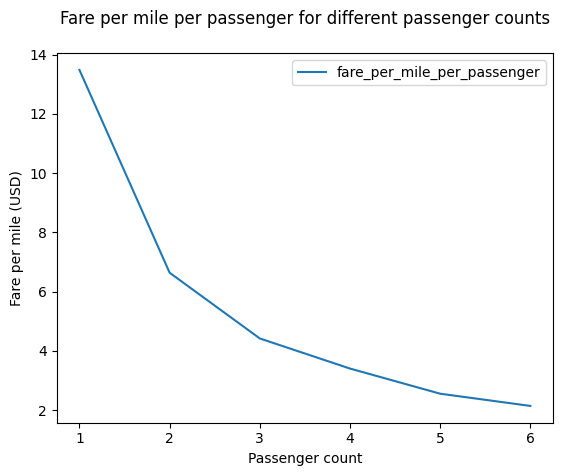

In [424]:
sns.lineplot(data=df_pass_fare)
plt.title('Fare per mile per passenger for different passenger counts\n')

plt.ylabel('Fare per mile (USD)')
plt.xlabel('Passenger count')

plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

# Compare the average fare per mile for 
- different days
- different times of the day

In [428]:
# Compare the average fare per mile for different days
df_avg_day_fare = non_zero_trip_df[['dayOfWeek', 'fare_per_mile']].groupby('dayOfWeek').mean()

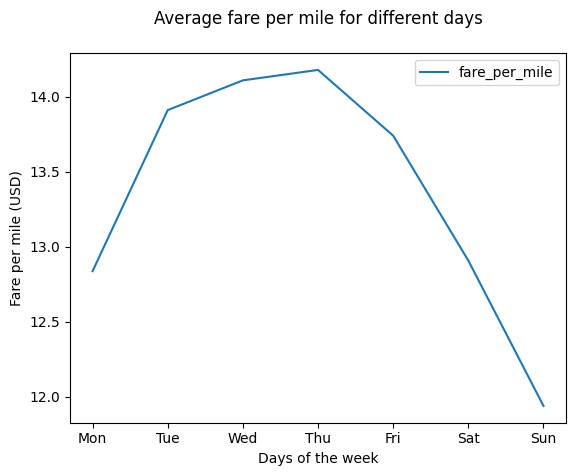

In [430]:
sns.lineplot(data=df_avg_day_fare)

plt.xlabel('Days of the week')

plt.xticks(
    ticks=np.array([0, 1, 2, 3, 4, 5, 6]),
    labels=np.array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
)

plt.ylabel('Fare per mile (USD)')

plt.title('Average fare per mile for different days\n')
plt.show()

In [432]:
# Compare the average fare per mile for different times of the day
df_avg_hour_fare = non_zero_trip_df[['hour', 'fare_per_mile']].groupby('hour').mean()

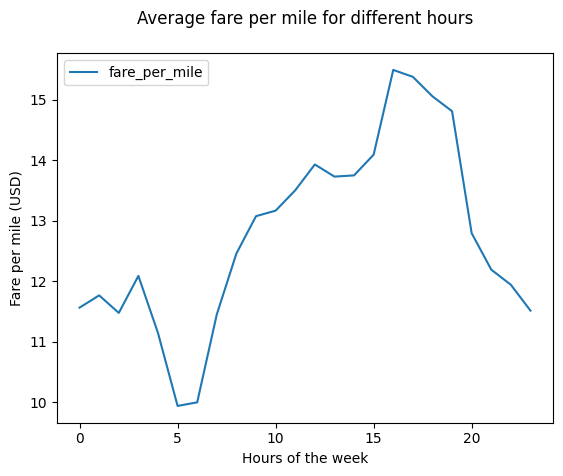

In [434]:
sns.lineplot(data=df_avg_hour_fare)
plt.xlabel('Hours of the week')
plt.ylabel('Fare per mile (USD)')

plt.title('Average fare per mile for different hours\n')
plt.show()

#### During the week we see a strong uptrend till Thursday then a gradual downtrend through the weekend

#### During the day its a different story, 
it takes a dip till 5 then gradually increased up to 12 (morning office rush)
a slight dip then shoots up till 5-6 pm

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [439]:
# Compare fare per mile for different vendors
non_zero_trip_df[['VendorID', 'hour', 'fare_per_mile']].head()

VendorID  hour  fare_per_mile
0         2     0          12.70
1         1     0          10.78
2         2     0          36.06
3         2     0          21.26
4         2     0          14.75

In [441]:
grouped_df = non_zero_trip_df[['VendorID', 'hour', 'fare_per_mile']].groupby(['hour', 'VendorID']).mean().reset_index()

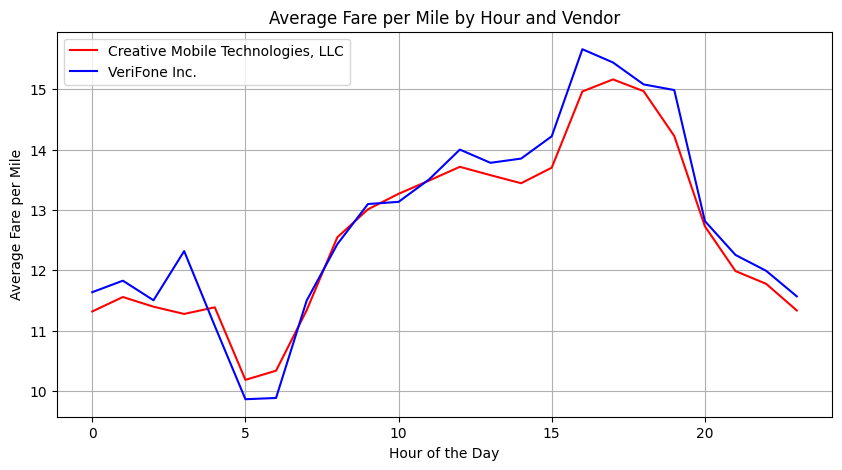

In [443]:
plt.figure(figsize=(10, 5))

vendor_1 = grouped_df[grouped_df['VendorID'] == 1]
plt.plot(
    vendor_1['hour'], 
    vendor_1['fare_per_mile'], 
    color='red', 
    label='Creative Mobile Technologies, LLC',
)

vendor_2 = grouped_df[grouped_df['VendorID'] == 2]
plt.plot(
    vendor_2['hour'], 
    vendor_2['fare_per_mile'], 
    color='blue', 
    label='VeriFone Inc.',
)

plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile")
plt.title("Average Fare per Mile by Hour and Vendor")
plt.legend()
plt.grid(True)

plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [446]:
# Defining distance tiers
def check_trip_tier(x):
    if x <= 2:
        return 1
    elif x > 2 and x <= 5:
        return 2
    else:
        return 3

In [448]:
non_zero_trip_df['trip_tier'] = non_zero_trip_df['trip_distance'].apply(check_trip_tier)

In [449]:
non_zero_trip_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:20:38   2023-12-01 00:25:29              1.0   
1         1  2023-12-01 00:17:05   2023-12-01 00:26:51              1.0   
2         2  2023-12-01 00:12:07   2023-12-01 00:15:28              1.0   
3         2  2023-12-01 00:15:39   2023-12-01 00:18:12              3.0   
4         2  2023-12-01 00:24:30   2023-12-01 00:27:25              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.27         1.0           164           114             1   
1           1.60         1.0            68            79             1   
2           0.35         1.0            48            48             1   
3           0.57         1.0           164           234             1   
4           0.80         1.0           161           237             1   

   fare_amount  ...   trip_duration  trip_duration_secs  PUYear  DOYear  \
0          7.9  ... 0 days 00:04:51                 291    2023    2023   
1         10.0  ... 0 days 00:09:46                 586    2023    2023   
2          5.1  ... 0 days 00:03:21                 201    2023    2023   
3          5.1  ... 0 days 00:02:33                 153    2023    2023   
4          5.8  ... 0 days 00:02:55                 175    2023    2023   

   dayOfWeek  quater  speed_mph  fare_per_mile  fare_per_mile_per_passenger  \
0          4       4      15.71          12.70                        12.70   
1          4       4       9.83          10.78                        10.78   
2          4       4       6.27          36.06                        36.06   
3          4       4      13.41          21.26                         7.09   
4          4       4      16.46          14.75                         7.38   

   trip_tier  
0          1  
1          1  
2          1  
3          1  
4          1  

[5 rows x 30 columns]

In [452]:
vendor_df = non_zero_trip_df[['VendorID', 'trip_tier', 'fare_per_mile']]

In [454]:
vendor_group_df = vendor_df.groupby(['trip_tier', 'VendorID']).mean().round(2).reset_index()

In [456]:
vendor_group_df

trip_tier  VendorID  fare_per_mile
0          1         1          16.92
1          1         2          17.91
2          2         1           9.21
3          2         2           9.49
4          3         1           6.12
5          3         2           6.18

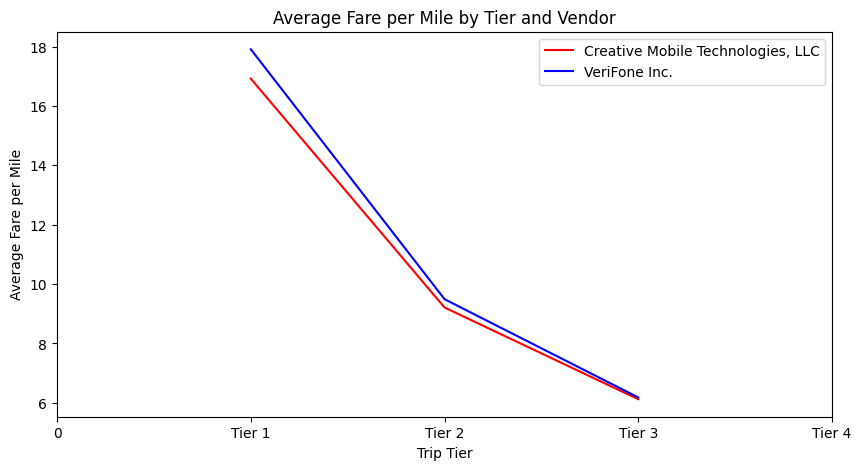

In [458]:
plt.figure(figsize=(10, 5))

vendor_1 = vendor_group_df[vendor_group_df['VendorID'] == 1]
plt.plot(
    vendor_1['trip_tier'], 
    vendor_1['fare_per_mile'], 
    color='red', 
    label='Creative Mobile Technologies, LLC',
)

vendor_2 = vendor_group_df[vendor_group_df['VendorID'] == 2]
plt.plot(
    vendor_2['trip_tier'], 
    vendor_2['fare_per_mile'], 
    color='blue', 
    label='VeriFone Inc.',
)

plt.xticks(
    ticks=np.array([0, 1, 2, 3, 4]),
    labels=np.array(['0', 'Tier 1', 'Tier 2', 'Tier 3', 'Tier 4'])
)

plt.xlabel("Trip Tier")
plt.ylabel("Average Fare per Mile")
plt.title("Average Fare per Mile by Tier and Vendor")
plt.legend()

plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [462]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
non_zero_trip_df[['tip_amount', 'total_amount']]

tip_amount  total_amount
0              3.23         16.13
1              2.25         17.25
2              2.52         12.62
3              2.02         12.12
4              1.00         11.80
...             ...           ...
1778575        0.00         17.10
1778576        6.08         36.48
1778577        1.88         11.28
1778578        3.56         21.36
1778579        2.30         13.80

[1766313 rows x 2 columns]

In [464]:
non_zero_trip_df['tip_perc'] = round((non_zero_trip_df['tip_amount'] / non_zero_trip_df['total_amount']) * 100, 2)

In [466]:
non_zero_trip_df[['tip_amount', 'total_amount', 'tip_perc']]

tip_amount  total_amount  tip_perc
0              3.23         16.13     20.02
1              2.25         17.25     13.04
2              2.52         12.62     19.97
3              2.02         12.12     16.67
4              1.00         11.80      8.47
...             ...           ...       ...
1778575        0.00         17.10      0.00
1778576        6.08         36.48     16.67
1778577        1.88         11.28     16.67
1778578        3.56         21.36     16.67
1778579        2.30         13.80     16.67

[1766313 rows x 3 columns]

# Analyze tip percentages based on distances, passenger counts and pickup times

In [469]:
non_zero_trip_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'date', 'hour', 'month', 'airport_fee',
       'trip_duration', 'trip_duration_secs', 'PUYear', 'DOYear', 'dayOfWeek',
       'quater', 'speed_mph', 'fare_per_mile', 'fare_per_mile_per_passenger',
       'trip_tier', 'tip_perc'],
      dtype='object')

In [471]:
non_zero_trip_df[['hour', 'tip_perc', 'passenger_count']]

hour  tip_perc  passenger_count
0           0     20.02              1.0
1           0     13.04              1.0
2           0     19.97              1.0
3           0     16.67              3.0
4           0      8.47              2.0
...       ...       ...              ...
1778575    23      0.00              1.0
1778576    23     16.67              1.0
1778577    23     16.67              1.0
1778578    23     16.67              1.0
1778579    23     16.67              1.0

[1766313 rows x 3 columns]

In [473]:
pass_tip_df = non_zero_trip_df[['tip_perc', 'passenger_count']].groupby('passenger_count').mean().reset_index()

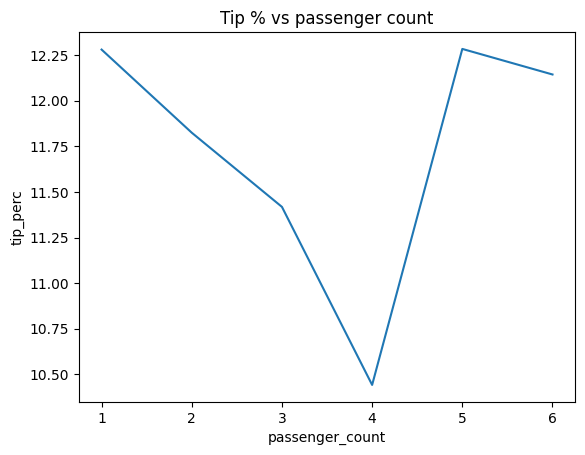

In [475]:
sns.lineplot(data=pass_tip_df, x='passenger_count', y='tip_perc')
plt.title('Tip % vs passenger count')
plt.show()

In [477]:
hour_tip_df = non_zero_trip_df[['tip_perc', 'hour']].groupby('hour').mean().reset_index()

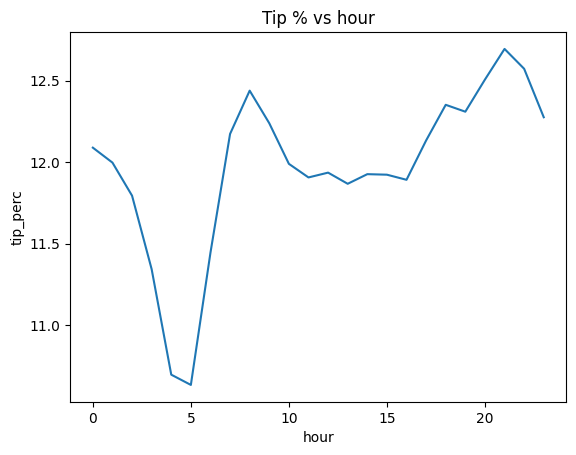

In [479]:
sns.lineplot(data=hour_tip_df, x='hour', y='tip_perc')
plt.title('Tip % vs hour')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [483]:
# See how passenger count varies across hours and days
pass_hour_df = non_zero_trip_df[['hour', 'passenger_count']].groupby('hour').count().reset_index()

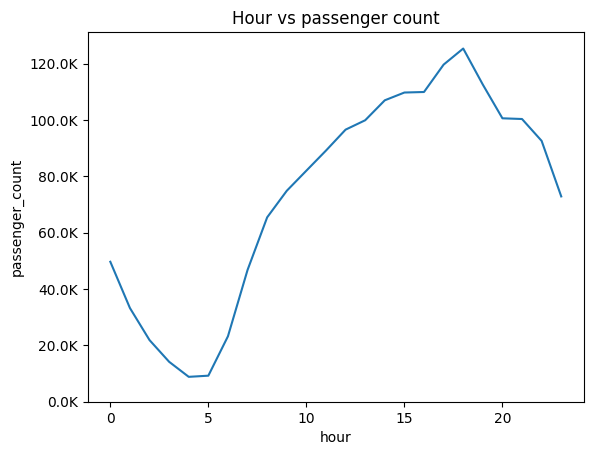

In [485]:
sns.lineplot(data=pass_hour_df, x='hour', y='passenger_count')

plt.yticks(
    ticks=np.arange(0, 140000, 20000),
    labels=["{0}K".format(x/1000) for x in np.arange(0, 140000, 20000)]
)

plt.title('Hour vs passenger count')
plt.show()

In [487]:
pass_dayofweek_df = non_zero_trip_df[['dayOfWeek', 'passenger_count']].groupby('dayOfWeek').count().reset_index()

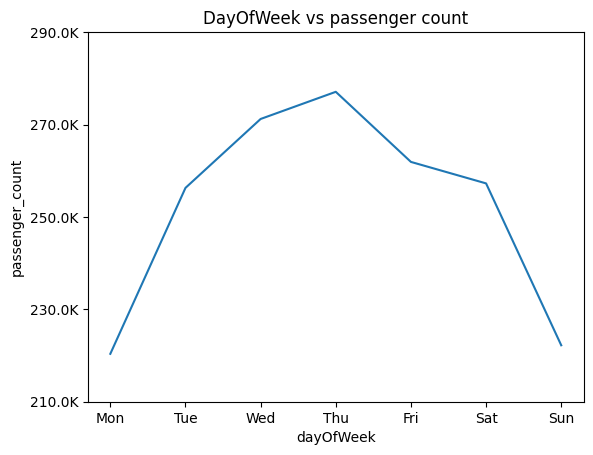

In [489]:
sns.lineplot(data=pass_dayofweek_df, x='dayOfWeek', y='passenger_count')

plt.yticks(
    ticks=np.arange(210000, 300000, 20000),
    labels=["{0}K".format(x/1000) for x in np.arange(210000, 300000, 20000)]
)

plt.xticks(
    ticks=np.array([0, 1, 2, 3, 4, 5, 6]),
    labels=np.array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
)

plt.title('DayOfWeek vs passenger count')
plt.show()

In [491]:
non_zero_trip_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'date', 'hour', 'month', 'airport_fee',
       'trip_duration', 'trip_duration_secs', 'PUYear', 'DOYear', 'dayOfWeek',
       'quater', 'speed_mph', 'fare_per_mile', 'fare_per_mile_per_passenger',
       'trip_tier', 'tip_perc'],
      dtype='object')

In [493]:
c = non_zero_trip_df[['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'tip_amount', 'improvement_surcharge', 'total_amount', 'trip_duration_secs']].corr()

<Axes: >

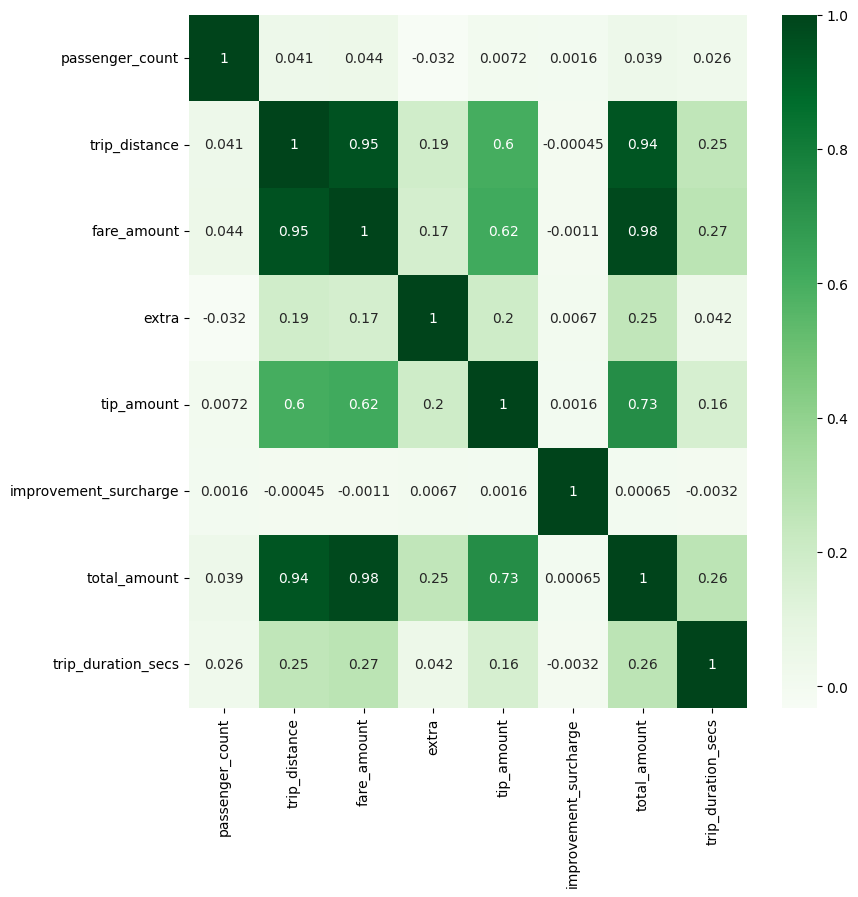

In [495]:
plt.figure(figsize=(9, 9))
sns.heatmap(c, cmap='Greens', annot=True)

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [498]:
# How does passenger count vary across zones
pass_zone_df = non_zero_trip_df[['passenger_count', 'PULocationID']].groupby('PULocationID').mean().reset_index()

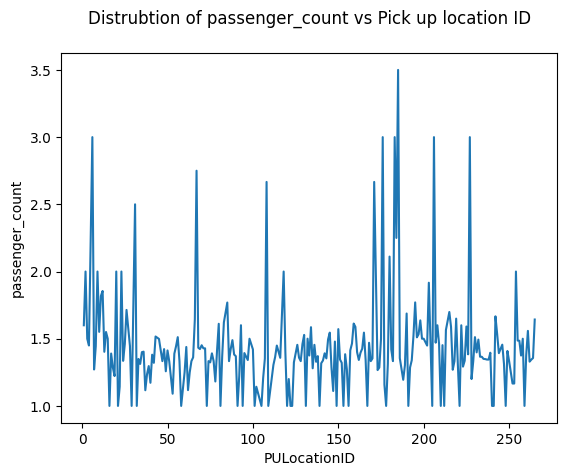

In [500]:
sns.lineplot(data=pass_zone_df, x='PULocationID', y='passenger_count')
plt.title('Distrubtion of passenger_count vs Pick up location ID\n')
plt.show()

In [502]:
pass_zone_df.head()

PULocationID  passenger_count
0             1         1.600000
1             2         2.000000
2             3         1.500000
3             4         1.449704
4             6         3.000000

In [504]:
dfm.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:20:38   2023-12-01 00:25:29              1.0   
1         1  2023-12-01 00:17:05   2023-12-01 00:26:51              1.0   
2         2  2023-12-01 00:12:07   2023-12-01 00:15:28              1.0   
3         2  2023-12-01 00:15:39   2023-12-01 00:18:12              3.0   
4         2  2023-12-01 00:24:30   2023-12-01 00:27:25              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.27         1.0           164           114             1   
1           1.60         1.0            68            79             1   
2           0.35         1.0            48            48             1   
3           0.57         1.0           164           234             1   
4           0.80         1.0           161           237             1   

   fare_amount  ...  DOYear  dayOfWeek  quater  OBJECTID  Shape_Leng  \
0          7.9  ...    2023          4       4     164.0    0.035772   
1         10.0  ...    2023          4       4      68.0    0.049337   
2          5.1  ...    2023          4       4      48.0    0.043747   
3          5.1  ...    2023          4       4     164.0    0.035772   
4          5.8  ...    2023          4       4     161.0    0.035804   

   Shape_Area            zone  LocationID    borough  \
0    0.000056   Midtown South       164.0  Manhattan   
1    0.000111    East Chelsea        68.0  Manhattan   
2    0.000094    Clinton East        48.0  Manhattan   
3    0.000056   Midtown South       164.0  Manhattan   
4    0.000072  Midtown Center       161.0  Manhattan   

                                            geometry  
0  POLYGON ((988787.425 210315.593, 988662.868 21...  
1  POLYGON ((983690.405 209040.369, 983550.612 20...  
2  POLYGON ((986694.313 214463.846, 986568.184 21...  
3  POLYGON ((988787.425 210315.593, 988662.868 21...  
4  POLYGON ((991081.026 214453.698, 990952.644 21...  

[5 rows x 33 columns]

In [506]:
zm.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   Total_trips  
0         52.0  
1          1.0  
2          2.0  
3       1699.0  
4          NaN

In [508]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones_with_trips = zm.merge(
    pass_zone_df, how='left', left_on='LocationID', right_on='PULocationID',
).rename(columns={'passenger_count': 'avg_pass_count'})

In [510]:
zones_with_trips.drop('PULocationID', axis=1, inplace=True)

In [512]:
zones_with_trips[['zone', 'Total_trips', 'avg_pass_count']].head(10)

zone  Total_trips  avg_pass_count
0           Newark Airport         52.0        1.600000
1              Jamaica Bay          1.0        2.000000
2  Allerton/Pelham Gardens          2.0        1.500000
3            Alphabet City       1699.0        1.449704
4            Arden Heights          NaN             NaN
5  Arrochar/Fort Wadsworth         28.0        3.000000
6                  Astoria        697.0        1.271137
7             Astoria Park         10.0        1.444444
8               Auburndale          3.0        2.000000
9             Baisley Park        466.0        1.551111

Find out how often surcharges/extra charges are applied to understand their prevalance

In [515]:
dfm.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'date', 'hour', 'month', 'airport_fee',
       'trip_duration', 'trip_duration_secs', 'PUYear', 'DOYear', 'dayOfWeek',
       'quater', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID',
       'borough', 'geometry'],
      dtype='object')

In [517]:
dfm.shape[0]

1771915

In [519]:
hour_surcharge_df = dfm[['hour', 'congestion_surcharge']].groupby('hour').count().reset_index()

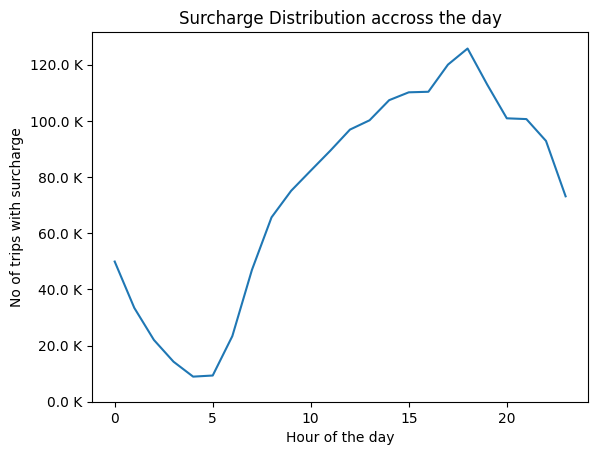

In [521]:
sns.lineplot(data=hour_surcharge_df, x='hour', y='congestion_surcharge')

plt.yticks(
    ticks=np.arange(0, 140000, 20000),
    labels=["{0} K".format(x/1000) for x in np.arange(0, 140000, 20000)]
)

plt.ylabel('No of trips with surcharge')
plt.xlabel('Hour of the day')
plt.title('Surcharge Distribution accross the day')
plt.show()

In [523]:
day_surcharge_df = dfm[['dayOfWeek', 'congestion_surcharge']].groupby('dayOfWeek').count().reset_index()

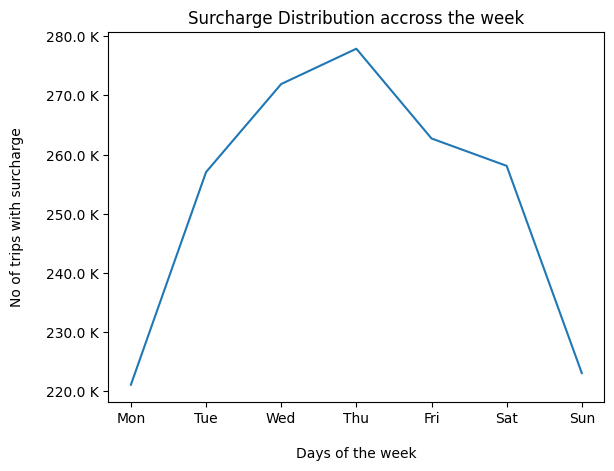

In [525]:
sns.lineplot(data=day_surcharge_df, x='dayOfWeek', y='congestion_surcharge')

plt.yticks(
    ticks=np.arange(220000, 290000, 10000),
    labels=["{0} K".format(x/1000) for x in np.arange(220000, 290000, 10000)]
)

plt.xticks(
    ticks=np.array([0, 1, 2, 3, 4, 5, 6]),
    labels=np.array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
)


plt.ylabel('No of trips with surcharge\n')
plt.xlabel('\nDays of the week')

plt.title('Surcharge Distribution accross the week')
plt.show()

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [528]:
# How often is each surcharge applied?
# day_surcharge_df = dfm[['PULocationID', 'extra']].groupby('dayOfWeek').count().reset_index()
pick_groupby_df = dfm[['PULocationID', 'extra', 'congestion_surcharge']].groupby('PULocationID').mean().reset_index()

In [530]:
pick_groupby_df.head()

PULocationID     extra  congestion_surcharge
0             1  0.370192                0.0000
1             2  0.000000                0.0000
2             3  1.250000                0.0000
3             4  1.474514                2.4897
4             6  0.553571                0.0000

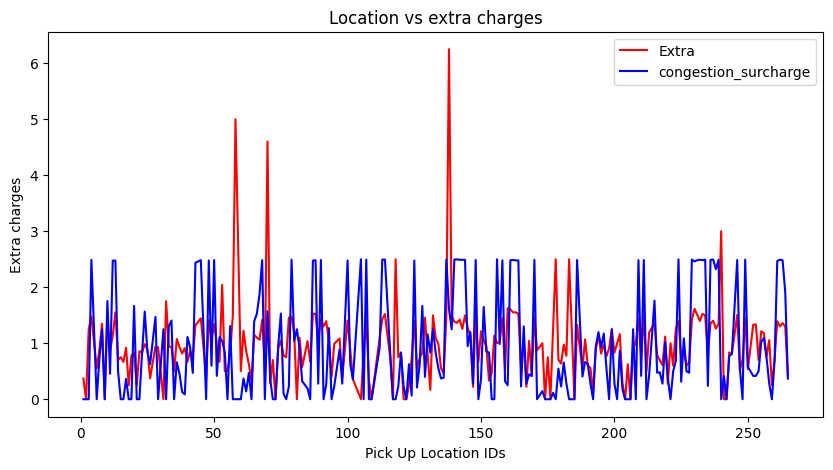

In [532]:
plt.figure(figsize=(10, 5))

extra = pick_groupby_df[['PULocationID', 'extra']]
plt.plot(
    extra['PULocationID'], 
    extra['extra'], 
    color='red', 
    label='Extra',
)

surcharge = pick_groupby_df[['PULocationID', 'congestion_surcharge']]
plt.plot(
    surcharge['PULocationID'], 
    surcharge['congestion_surcharge'], 
    color='blue', 
    label='congestion_surcharge',
)

plt.xlabel("Pick Up Location IDs")
plt.ylabel("Extra charges")
plt.title("Location vs extra charges")
plt.legend()

plt.show()

In [534]:
# How often is each surcharge applied?
drop_groupby_df = dfm[['DOLocationID', 'extra', 'congestion_surcharge']].groupby('DOLocationID').mean().reset_index()

In [536]:
drop_groupby_df.head()

DOLocationID     extra  congestion_surcharge
0             1  0.502857              0.024133
1             2  1.625000              0.000000
2             3  2.316532              0.584677
3             4  1.701957              2.497425
4             5  0.666667              0.416667

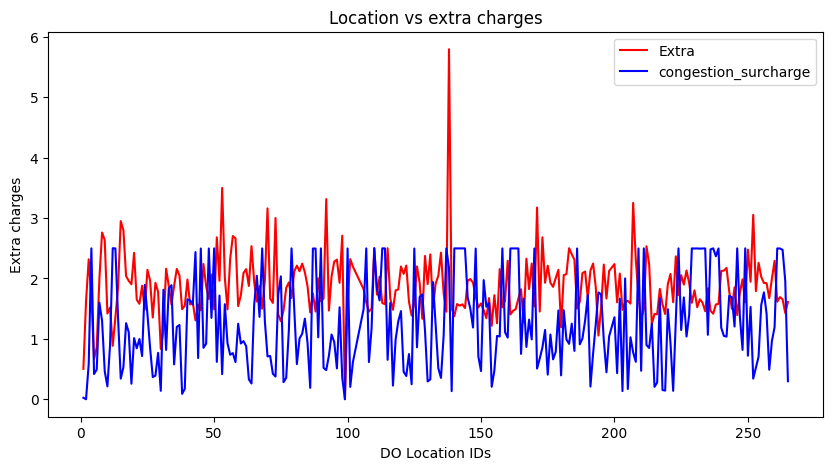

In [538]:
plt.figure(figsize=(10, 5))

extra = drop_groupby_df[['DOLocationID', 'extra']]
plt.plot(
    extra['DOLocationID'], 
    extra['extra'], 
    color='red', 
    label='Extra',
)

surcharge = drop_groupby_df[['DOLocationID', 'congestion_surcharge']]
plt.plot(
    surcharge['DOLocationID'], 
    surcharge['congestion_surcharge'], 
    color='blue', 
    label='congestion_surcharge',
)

plt.xlabel("DO Location IDs")
plt.ylabel("Extra charges")
plt.title("Location vs extra charges")
plt.legend()

plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

After analysing the data

we know majority of the cab hires are done by a single passenger
and during peak traffic hour this could create problems for both driver and passengers.

Increasing the cabs might be benificial in certain regions but not adviceable during peak hours
we can keep a fixed number of cabs in low availabity areas to not miss out on any potentail revenue.

We can propose a **cab sharing** model.
which will can reduce the wait time for passenger and also increase revenue for the drivers.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
top_10_pick_zones

- The above data shows the top 10 pick up zones and their respective peak hours
- We can provision more taxis at the given time to increase revenue and customer satisfaction
- we can move taxis from the zones where the demand is not much

In [ ]:
bottom_10_pick_zones

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

- Post 12pm rates are consistently high for VeriFone vendor
- we can adjust the pricing by about 2-3 USD / hour to provide a much competitive rate